# SocialSphere User Data

Social media user data is crucial for a company as it provides essential insights into customer behavior, preferences, and emotions. By understanding how users interact with brands on social platforms, companies can shape and organize their marketing strategies to effectively target and attract the right audience. User data allows businesses to identify emerging trends, monitor competitor activities, and adapt their own strategies accordingly, ensuring they stay ahead in a constantly volatile customer landscape. Furthermore, analyzing social media user data enables companies to optimize their products and services based on real-time feedback, ultimately creating stronger customer relationships and driving business growth. In essence, utilizing social media data allows companies to make informed decisions, enhance their brand presence, and deliver more personalized support to their audience.

In this notebook, we are going to analyze user data from the fictional social media platform, SocialSphere, and assist stakeholders in finding potential user patterns and emerging trends. SocialSphere is a media application that integrates various social media streams for seamless interaction and synchronization, all organized on our homepage. We aim to analyze user data and identify patterns and trends in user posting, behavior, feedback, and criticism. We need to ensure our platform is as seamless as possible while providing our users with a clean and concise UI. Additionally, we want to provide useful data to our software engineers to determine which platforms are used most and whether we should reintegrate the layout of our application.

The dataset we will be using comes in both JSON and CSV formats. It contains data for 50 users, including their ID number, preferred platform, username, caption from the most recent post, average likes, average shares, average comments, and the timestamp of their latest post. Below, we will find the answers to questions such as:

- [How many posts were made on each platform?](#how-many-posts-were-made-on-each-platform)
- [How does the number of posts vary over time?](#how-does-the-number-of-posts-vary-over-time)
- [What is the maximum, minimum, and average number of likes, comments, and shares per platform?](#what-is-the-maximum-minimum-and-average-number-of-likes-comments-and-shares-per-platform)
- [How do the distributions of likes and comments differ across platforms?](#how-do-the-distributions-of-likes-and-comments-differ-across-platforms)
- [What is the engagement rate (likes + comments) for each platform?](#What-is-the-engagement-rate-likes-comments-for-each-platform)
- [How has the engagement rate changed over time for each platform?](#How-has-the-engagement-rate-changed-over-time-for-each-platform)
- [Is there any correlation between the number of comments and the timestamp of the post?](#Is-there-any-correlation-between-the-number-of-comments-and-the-timestamp-of-the-post)
- [Do posts with longer captions tend to get more engagement?](#Do-posts-with-longer-captions-tend-to-get-more-engagement)
- [Are there any common keywords in the captions?](#Are-there-any-common-keywords-in-the-captions)
- [Do certain keywords have a trend of higher engagement?](#Do-certain-keywords-have-a-trend-of-higher-engagement)
- [Conclusion](#Conclusion)


**EXTRA**
- [JSON Conversion](#json-conversion)
- [CSV Conversion](#csv-conversion)
- [Data Cleaning](#now-that-we-have-a-dataframe-we-must-trim-clean-and-organize-it-prior-to-any-organization)

# Important Information

##### Prior to any code creation, charting, plotting, manipulation, organization, etc., it's important to note how chart creation can have important variety and differences even if the code looks similar.

Throughout this code, we will be using visualization libraries such as ```Pandas``` and ```Matplotlib```. Inside of ```Matplotlib```, the '.plot()' function is used to visualize data usually from ```Pandas```.

```Matplotlib``` hosts the ability to input x and y values manually via the 'x =' & 'y =' functions. An example will be seen below:

```df.plot(kind = 'scatter', x = 'timestamp', y = 'comments', figsize=(10, 6), color = 'black')```

However, each plot hosts differences in the x and y format, even if the code line looks the same. The differences are seen below:

--------------------------------------------------------------------------------------------------------------

**Scatter Plots:** x and y represent the values of the relationship between TWO variables. Additionally, each point is plotted at the corresponding (x, y) coordinate.

**Line Plots:** x and y represent data points following the x and y axes.

**Bar Charts:** x represents categories or labels, while y represents the values associated with those categories or labels.

**Box Plots:** x represents categories or groups, and y represents the numerical values within each category or group.

**Histograms:** x represents the numerical data to be divided into cells(bins). y represents the count of occurrences within each cell(bin).

**Pie Charts:** x represents categories or labels. Pie Charts are not linear therefore they have no axes, and y is not used.

**Heatmaps:** x and y represent the relationship between TWO variables whether it be through categories or labels. 

**Area Charts:** x represents the time or a continuous variable along the horizontal(x) axis. y represents numerical data or values along the vertical(y) axis.

--------------------------------------------------------------------------------------------------------------

Plots require input, whether it be manual x(x=) and y(y=) input or using variables to automatically create plots such as:

```posts_per_month.plot(kind = 'bar', figsize = (10, 6), edgecolor = 'black', color = 'orange')```

***Throughout this notebook, I will be varying between using 'x =' & 'y =' and variable creation. Personally, I am a thorough person; therefore, writing code that describes itself is easier for me to understand and describe. Since different plots have different meanings in the sense of axes values, I believe describing the value itself and then using '.plot()' is a far easier way to write and understand code.***

***Additionally, we will import several libraries throughout this notebook. It is only necessary to import one time for each library; however, I would like to show where the libraries will be used and when to use them. Therefore, I will import the libraries in every kernel, just to fully explain and visualize our libraries.***

## Conversion and Organization

We must import our data. It seems my Jupyter Notebook is unable to read a CSV or JSON file from my path. However, this will not stop the project!

Below is the way to convert files from both CSV and JSON formats into Python. To commence the project, I will create the JSON file within Python and create our DataFrames.

<a id= 'json-conversion' ></a> **JSON Conversion:**

import pandas as pd

data = pd.read_json('user_info.json')

df = pd.json_normalize(data['posts'])

<a id= 'csv-conversion' ><a/> **CSV Conversion:**

import pandas as pd

df = pd.read_csv('user_info.json')

print(df)

**Our Importation:**

In [2]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organizaition, analyzation, and visualization. 
import pandas as pd

data = {
  "posts": [
    {
      "id": 1,
      "platform": "Instagram",
      "username": "happysoul123",
      "caption": "Feeling grateful today! 🌟",
      "likes": 150,
      "comments": 40,
      "timestamp": "2023-12-15T08:30:00Z"
    },
    {
      "id": 2,
      "platform": "Facebook",
      "username": "creativegirl22",
      "caption": "Check out our latest blog post!",
      "likes": 300,
      "shares": 150,
      "comments": 50,
      "timestamp": "2023-12-20T12:00:00Z"
    },
    {
      "id": 3,
      "platform": "Twitter",
      "username": "techiegeek007",
      "caption": "Exploring new technologies 🔬",
      "likes": 400,
      "comments": 100,
      "timestamp": "2023-11-25T15:00:00Z"
    },
    {
      "id": 4,
      "platform": "LinkedIn",
      "username": "flowerlover88",
      "caption": "Networking with like-minded professionals",
      "likes": 450,
      "comments": 120,
      "timestamp": "2023-11-30T18:00:00Z"
    },
    {
      "id": 5,
      "platform": "Twitter",
      "username": "adventureseeker55",
      "caption": "Embracing the spirit of adventure 🌍",
      "likes": 380,
      "comments": 90,
      "timestamp": "2023-11-20T10:00:00Z"
    },
    {
      "id": 6,
      "platform": "Facebook",
      "username": "fashionista123",
      "caption": "New fashion trends for the season!",
      "likes": 280,
      "shares": 120,
      "comments": 60,
      "timestamp": "2023-11-15T14:00:00Z"
    },
    {
      "id": 7,
      "platform": "Instagram",
      "username": "musiclover99",
      "caption": "Dancing to the rhythm of life 🎵",
      "likes": 420,
      "comments": 110,
      "timestamp": "2023-10-10T17:00:00Z"
    },
    {
      "id": 8,
      "platform": "Twitter",
      "username": "travelbug22",
      "caption": "Wanderlust at its finest ✈️",
      "likes": 350,
      "comments": 80,
      "timestamp": "2023-10-05T20:00:00Z"
    },
    {
      "id": 9,
      "platform": "LinkedIn",
      "username": "codingninja007",
      "caption": "Mastering the art of coding 💻",
      "likes": 500,
      "comments": 150,
      "timestamp": "2023-10-01T22:00:00Z"
    },
    {
      "id": 10,
      "platform": "Instagram",
      "username": "sunsetdreamer22",
      "caption": "Chasing sunsets and dreams 🌅✨",
      "likes": 430,
      "comments": 130,
      "timestamp": "2023-09-01T23:59:00Z"
    },
    {
      "id": 11,
      "platform": "Facebook",
      "username": "bookworm1234",
      "caption": "Book recommendations for the month!",
      "likes": 320,
      "shares": 100,
      "comments": 70,
      "timestamp": "2023-08-01T01:00:00Z"
    },
    {
      "id": 12,
      "platform": "Twitter",
      "username": "foodiegirl123",
      "caption": "Indulging in culinary delights 🍽️",
      "likes": 370,
      "comments": 95,
      "timestamp": "2023-08-01T03:00:00Z"
    },
    {
      "id": 13,
      "platform": "LinkedIn",
      "username": "artlover789",
      "caption": "Appreciating the beauty of art 🎨",
      "likes": 480,
      "comments": 140,
      "timestamp": "2023-08-01T05:00:00Z"
    },
    {
      "id": 14,
      "platform": "Instagram",
      "username": "fitnessfreak101",
      "caption": "Embracing a healthy lifestyle 💪",
      "likes": 410,
      "comments": 115,
      "timestamp": "2023-08-01T07:00:00Z"
    },
    {
      "id": 15,
      "platform": "Twitter",
      "username": "naturelover456",
      "caption": "Connecting with nature 🌿",
      "likes": 360,
      "comments": 85,
      "timestamp": "2023-08-01T09:00:00Z"
    },
    {
      "id": 16,
      "platform": "Facebook",
      "username": "coffeeaddict77",
      "caption": "The perfect cup of coffee ☕",
      "likes": 290,
      "shares": 110,
      "comments": 65,
      "timestamp": "2023-08-01T11:00:00Z"
    },
    {
      "id": 17,
      "platform": "Instagram",
      "username": "petlover222",
      "caption": "Unconditional love from our furry friends 🐾",
      "likes": 440,
      "comments": 105,
      "timestamp": "2023-08-01T13:00:00Z"
    },
    {
      "id": 18,
      "platform": "Twitter",
      "username": "photographyenthusiast",
      "caption": "Capturing moments one click at a time 📸",
      "likes": 390,
      "comments": 75,
      "timestamp": "2023-07-01T15:00:00Z"
    },
    {
      "id": 19,
      "platform": "LinkedIn",
      "username": "startupfounder2022",
      "caption": "Bringing innovative ideas to life!",
      "likes": 520,
      "comments": 160,
      "timestamp": "2023-07-01T17:00:00Z"
    },
    {
      "id": 20,
      "platform": "Instagram",
      "username": "travelenthusiast33",
      "caption": "Exploring new horizons 🌏",
      "likes": 450,
      "comments": 125,
      "timestamp": "2023-07-01T19:00:00Z"
    },
    {
      "id": 21,
      "platform": "Facebook",
      "username": "musiclover555",
      "caption": "Discover new tunes for your playlist!",
      "likes": 330,
      "shares": 90,
      "comments": 75,
      "timestamp": "2023-06-01T21:00:00Z"
    },
    {
      "id": 22,
      "platform": "Twitter",
      "username": "codingenthusiast999",
      "caption": "Diving deep into the world of coding",
      "likes": 370,
      "comments": 100,
      "timestamp": "2023-06-01T23:00:00Z"
    },
    {
      "id": 23,
      "platform": "LinkedIn",
      "username": "businessmind2022",
      "caption": "Entrepreneurship journey begins!",
      "likes": 510,
      "comments": 150,
      "timestamp": "2023-06-01T01:00:00Z"
    },
    {
      "id": 24,
      "platform": "Instagram",
      "username": "yogalover888",
      "caption": "Finding peace through yoga 🧘",
      "likes": 420,
      "comments": 110,
      "timestamp": "2023-06-01T03:00:00Z"
    },
    {
      "id": 25,
      "platform": "Facebook",
      "username": "gardeningenthusiast44",
      "caption": "Gardening tips for beginners!",
      "likes": 300,
      "shares": 120,
      "comments": 70,
      "timestamp": "2023-06-01T05:00:00Z"
    },
    {
      "id": 26,
      "platform": "Twitter",
      "username": "foodblogger123",
      "caption": "Exploring culinary delights around the world",
      "likes": 380,
      "comments": 90,
      "timestamp": "2023-06-01T07:00:00Z"
    },
    {
      "id": 27,
      "platform": "LinkedIn",
      "username": "techenthusiast222",
      "caption": "Tech innovations shaping the future",
      "likes": 490,
      "comments": 140,
      "timestamp": "2023-06-01T09:00:00Z"
    },
    {
      "id": 28,
      "platform": "Instagram",
      "username": "fitnesslover777",
      "caption": "Transforming lives through fitness 💪",
      "likes": 410,
      "comments": 115,
      "timestamp": "2023-06-01T11:00:00Z"
    },
    {
      "id": 29,
      "platform": "Facebook",
      "username": "bookworm999",
      "caption": "Join our book club for exciting reads!",
      "likes": 320,
      "shares": 100,
      "comments": 65,
      "timestamp": "2023-06-01T13:00:00Z"
    },
    {
      "id": 30,
      "platform": "Twitter",
      "username": "photographylover2021",
      "caption": "Every picture tells a story 📷",
      "likes": 360,
      "comments": 85,
      "timestamp": "2023-06-01T15:00:00Z"
    },
    {
      "id": 31,
      "platform": "LinkedIn",
      "username": "businessmind2021",
      "caption": "Striving for success in the corporate world",
      "likes": 530,
      "comments": 170,
      "timestamp": "2023-06-01T17:00:00Z"
    },
    {
      "id": 32,
      "platform": "Instagram",
      "username": "traveller999",
      "caption": "Wanderlust and city dust ✈️🌆",
      "likes": 460,
      "comments": 130,
      "timestamp": "2023-06-01T19:00:00Z"
    },
    {
      "id": 33,
      "platform": "Facebook",
      "username": "musiclover777",
      "caption": "Music therapy for the soul 🎶",
      "likes": 340,
      "shares": 80,
      "comments": 60,
      "timestamp": "2023-06-01T21:00:00Z"
    },
    {
      "id": 34,
      "platform": "Twitter",
      "username": "codingenthusiast888",
      "caption": "Coding is my superpower 💻",
      "likes": 380,
      "comments": 110,
      "timestamp": "2023-05-01T23:00:00Z"
    },
    {
      "id": 35,
      "platform": "LinkedIn",
      "username": "startupfounder2021",
      "caption": "From idea to execution: Startup journey begins!",
      "likes": 550,
      "comments": 190,
      "timestamp": "2023-05-01T01:00:00Z"
    },
    {
      "id": 36,
      "platform": "Instagram",
      "username": "yogalover777",
      "caption": "Find your inner peace through yoga 🧘‍♂️",
      "likes": 440,
      "comments": 150,
      "timestamp": "2023-05-01T03:00:00Z"
    },
    {
      "id": 37,
      "platform": "Facebook",
      "username": "gardeningenthusiast33",
      "caption": "Gardening hacks for a green thumb!",
      "likes": 310,
      "shares": 110,
      "comments": 55,
      "timestamp": "2023-05-01T05:00:00Z"
    },
    {
      "id": 38,
      "platform": "Twitter",
      "username": "foodiegirl999",
      "caption": "Food is my love language 🍔🥗",
      "likes": 390,
      "comments": 120,
      "timestamp": "2023-04-01T07:00:00Z"
    },
    {
      "id": 39,
      "platform": "LinkedIn",
      "username": "techenthusiast333",
      "caption": "Exploring the latest tech trends",
      "likes": 510,
      "comments": 200,
      "timestamp": "2023-04-01T09:00:00Z"
    },
    {
      "id": 40,
      "platform": "Instagram",
      "username": "fitnesslover999",
      "caption": "Fitness is not a destination, it's a way of life 💪",
      "likes": 460,
      "comments": 170,
      "timestamp": "2023-04-01T11:00:00Z"
    },
    {
      "id": 41,
      "platform": "Facebook",
      "username": "bookworm888",
      "caption": "Books open doors to new worlds!",
      "likes": 330,
      "shares": 120,
      "comments": 70,
      "timestamp": "2023-04-01T13:00:00Z"
    },
    {
      "id": 42,
      "platform": "Twitter",
      "username": "photographylover999",
      "caption": "Capturing memories one click at a time 📸",
      "likes": 400,
      "comments": 130,
      "timestamp": "2023-04-01T15:00:00Z"
    },
    {
      "id": 43,
      "platform": "LinkedIn",
      "username": "businessmind2020",
      "caption": "Building empires, one step at a time",
      "likes": 540,
      "comments": 210,
      "timestamp": "2023-04-01T17:00:00Z"
    },
    {
      "id": 44,
      "platform": "Instagram",
      "username": "traveller777",
      "caption": "Adventure awaits around every corner 🌍",
      "likes": 490,
      "comments": 190,
      "timestamp": "2023-03-01T19:00:00Z"
    },
    {
      "id": 45,
      "platform": "Facebook",
      "username": "musiclover999",
      "caption": "Let music be the soundtrack of your life 🎵",
      "likes": 350,
      "shares": 100,
      "comments": 65,
      "timestamp": "2023-03-01T21:00:00Z"
    },
    {
      "id": 46,
      "platform": "Twitter",
      "username": "codingenthusiast777",
      "caption": "Coding is the new literacy 💻",
      "likes": 410,
      "comments": 150,
      "timestamp": "2023-02-01T23:00:00Z"
    },
    {
      "id": 47,
      "platform": "LinkedIn",
      "username": "startupfounder2020",
      "caption": "From idea to impact: Startup journey unfolds",
      "likes": 570,
      "comments": 230,
      "timestamp": "2023-02-01T01:00:00Z"
    },
    {
      "id": 48,
      "platform": "Instagram",
      "username": "yogalover999",
      "caption": "Breathe, stretch, and let go 🌬️",
      "likes": 480,
      "comments": 210,
      "timestamp": "2023-02-01T03:00:00Z"
    },
    {
      "id": 49,
      "platform": "Facebook",
      "username": "gardeningenthusiast999",
      "caption": "Gardening brings joy and tranquility!",
      "likes": 370,
      "shares": 130,
      "comments": 75,
      "timestamp": "2023-02-01T05:00:00Z"
    },
    {
      "id": 50,
      "platform": "Twitter",
      "username": "foodiegirl777",
      "caption": "Life is too short to eat boring food! 🍣",
      "likes": 420,
      "comments": 160,
      "timestamp": "2023-01-01T07:00:00Z"
    }
   ]
 }

# Due to the nested arrays present in this DataFrame we must flatten (normalize) the JSON structure.
df = pd.json_normalize(data['posts'])

# In order for clarity, we will only display the DataFrame's first 10 rows.  
df.head(10)

,id,platform,username,caption,likes,comments,timestamp,shares
0,1,Instagram,happysoul123,Feeling grateful today! 🌟,150,40,2023-12-15T08:30:00Z,NaN
1,2,Facebook,creativegirl22,Check out our latest blog post!,300,50,2023-12-20T12:00:00Z,150.0
2,3,Twitter,techiegeek007,Exploring new technologies 🔬,400,100,2023-11-25T15:00:00Z,NaN
3,4,LinkedIn,flowerlover88,Networking with like-minded professionals,450,120,2023-11-30T18:00:00Z,NaN
4,5,Twitter,adventureseeker55,Embracing the spirit of adventure 🌍,380,90,2023-11-20T10:00:00Z,NaN
5,6,Facebook,fashionista123,New fashion trends for the season!,280,60,2023-11-15T14:00:00Z,120.0
6,7,Instagram,musiclover99,Dancing to the rhythm of life 🎵,420,110,2023-10-10T17:00:00Z,NaN
7,8,Twitter,travelbug22,Wanderlust at its finest ✈️,350,80,2023-10-05T20:00:00Z,NaN
8,9,LinkedIn,codingninja007,Mastering the art of coding 💻,500,150,2023-10-01T22:00:00Z,NaN
9,10,Instagram,sunsetdreamer22,Chasing sunsets and dreams 🌅✨,430,130,2023-09-01T23:59:00Z,NaN


## <a id= 'now-that-we-have-a-dataframe-we-must-trim-clean-and-organize-it-prior-to-any-organization' ></a> Now that we have a DataFrame, we must trim, clean, and organize it prior to any analyzation. 

### [Home](#SocialSphere-User-Data)

In [3]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analyzation, and visualization. 
import pandas as pd

# In order to eventually evaluate and analyze our DataFrame to its fullest potential, we must convert all str values into int values eventually.
# Our first step would be to convert all NaN values, created due to many of our apps lacking the 'share' column into a calculatable form, a 0. 
# Since the NaN value is a NULL value we can use .fillna(). We are going to permanently change our DataFrame using the 'inplace=' function. 
# Additionally, if we wanted to replace a value besides NULL, NaN, or None, the function .replace() would be more suited for the job.
df.fillna(0, inplace=True)

# I also noticed that in our DataFrame above, while it looks good, it isn't. The timestamps are out of order.
# For example Row: 4 has a later timestamp than Row: 5. 
# To start this off we will to permanently change our DataFrame(df) by first stating 'df = '.
# Once our DataFrame has been included we will need to sort our values in our DataFrame('df.sort_values()') by 'timestamp' in order to fix the errors mentioned above.
# I would also like to keep it in descending order, therefore we must make 'ascending= False'.
df = df.sort_values(by = 'timestamp', ascending=False)

# Because we are evaluating 50 unique individuals, we will want to eliminate any duplicate users as this will destroy our analysis of unique data. 
# This function will remove any duplicate values found in the username column.
df.drop_duplicates(['username'], inplace=True)

# It seems some numerical columns are separated from the rest, as well as some columns are unneeded. 
# This function will set the new order of the columns present in our DataFrame.
sorted_columns = ['platform', 'username', 'caption', 'likes', 'comments', 'shares', 'timestamp']

# Due to our manipulation of both 'df_sorted' as well as 'sorted_columns' we need to basically lock in our DataFrame's structure by the use of .reindex().
# This function will basically reorder the columns based on 'sorted_columns' and 100% lock our manipulation in place.
df = df.reindex(columns = sorted_columns)

# This function, oddly enough is insanely important to the cleaning of our data, the resetting of our index numbers.
# Without this function, our DataFrame's index numbers will be all over the place due to the sorting of 'timestamp'.
# With this function, we will reorder the index ascendingly. 
df.reset_index(drop = True, inplace = True)

# For clarity's sake, we will print only 5 rows of our DataFrame to not clog the screen.
df.head(10)

,platform,username,caption,likes,comments,shares,timestamp
0,Facebook,creativegirl22,Check out our latest blog post!,300,50,150.0,2023-12-20T12:00:00Z
1,Instagram,happysoul123,Feeling grateful today! 🌟,150,40,0.0,2023-12-15T08:30:00Z
2,LinkedIn,flowerlover88,Networking with like-minded professionals,450,120,0.0,2023-11-30T18:00:00Z
3,Twitter,techiegeek007,Exploring new technologies 🔬,400,100,0.0,2023-11-25T15:00:00Z
4,Twitter,adventureseeker55,Embracing the spirit of adventure 🌍,380,90,0.0,2023-11-20T10:00:00Z
5,Facebook,fashionista123,New fashion trends for the season!,280,60,120.0,2023-11-15T14:00:00Z
6,Instagram,musiclover99,Dancing to the rhythm of life 🎵,420,110,0.0,2023-10-10T17:00:00Z
7,Twitter,travelbug22,Wanderlust at its finest ✈️,350,80,0.0,2023-10-05T20:00:00Z
8,LinkedIn,codingninja007,Mastering the art of coding 💻,500,150,0.0,2023-10-01T22:00:00Z
9,Instagram,sunsetdreamer22,Chasing sunsets and dreams 🌅✨,430,130,0.0,2023-09-01T23:59:00Z


## <a id='how-many-posts-were-made-on-each-platform'></a> How many posts were made on each platform?

### [Home](#SocialSphere-User-Data)
After formatting our DataFrame, we can see the first 10 rows without duplicates and with a new column order. Before we determine any metric amounts, we must analyze the distribution of posts per platform.

In the section below, we will calculate the post distribution per platform present in our DataFrame and provide a pie chart via Matplotlib..


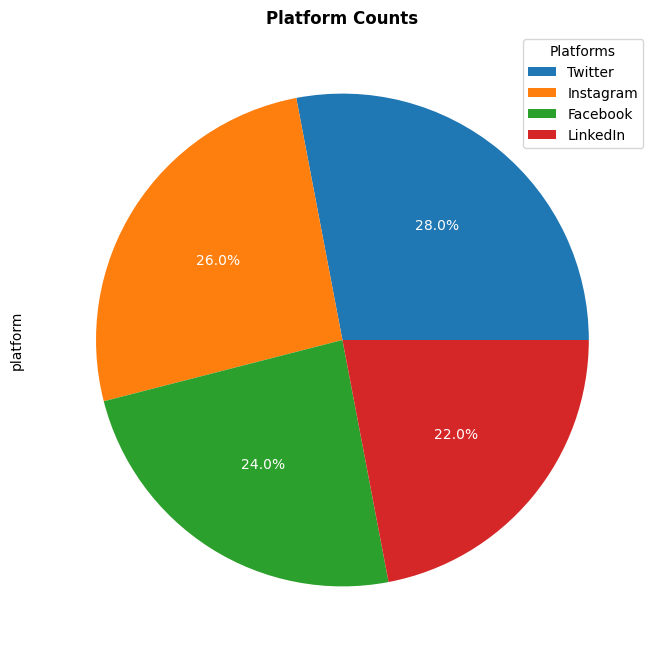

Platform: Twitter - Count: 14 |  Platform: Instagram - Count: 13 |  Platform: Facebook - Count: 12 |  Platform: LinkedIn - Count: 11 |


In [4]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analysis, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl

# Here is the bread and butter of our function, the actual count of our platforms! 
# We will input our DataFrame's column which we would like to count, and then our counting function, 'value_counts()'.
platform_counts = df['platform'].value_counts()

# Next we will craft our chart, which in this case is a pie to demonstrate the differences in platform post-count dominance. 
# We will make it 10x8 inches so it doesn't completely take over the page, and using 'autopct =' we will show the percentages of popularity. 
# We will also color our percentages white, using 'textprops ='.
platform_counts.plot(kind = 'pie', figsize = (10, 8), autopct = '%1.1f%%', textprops = {'color': "white"})

# Here we have our chart's title! 
# With other index-related visuals, we would include our (x,y) axis however since we are visualizing via a pie chart, there is no need! 
# It's important to note that its good practice to create your chart/plot before the title and axes.
# Depending on the chart, it could result in code failure or multiple charts being created. We will see this later.
mpl.title('Platform Counts', fontweight='bold')

# What's a chart without a legend? Here we have our legend function, created with '.legend()'. 
# Its values are the index labels associated with 'platform_counts', which in this case are the platforms. 
# Additionally, where should that legend be located? Well! The "best" place for it to be seen of course!
mpl.legend(platform_counts.index, title = 'Platforms', loc = "best")

# I also wanted to include our count via text using the .items() function. 
# This line creates a list that iterates through our platform column and counts each variable while showing the format as: 'Platform: Count:'.
platform_count_str = [f"Platform: {web} - Count: {count} |" for web, count in platform_counts.items()]

# Lastly in our journey of plot creation, we will print it out by the use of 'func.show()'.
mpl.show()

# Since the previous function makes our item function as a list to keep our elements next to, not over each other, we would need to change that list format. 
# We can use list comprehension to eliminate the list format and instead make it into a horizontal demonstration separated by a space(" ").
print("  ".join(platform_count_str))

## <a id='how-does-the-number-of-posts-vary-over-time'></a> How does the number of posts vary over time?

### [Home](#SocialSphere-User-Data)

**Wow! It seems like Twitter is our most popular app, while LinkedIn is our least used.**

This information will definitely benefit our team, especially our software engineer, who will be informed of the statistics. Possible solutions to imbalanced app usage could include enhancing UI features, creating a stronger social media presence for SocialSphere, and marketing SocialSphere's updates, news, and exclusive content.

Our next step is to see how time can affect user schedules and post counts. Does the number of posts vary over time? In the section below, we will explore this:

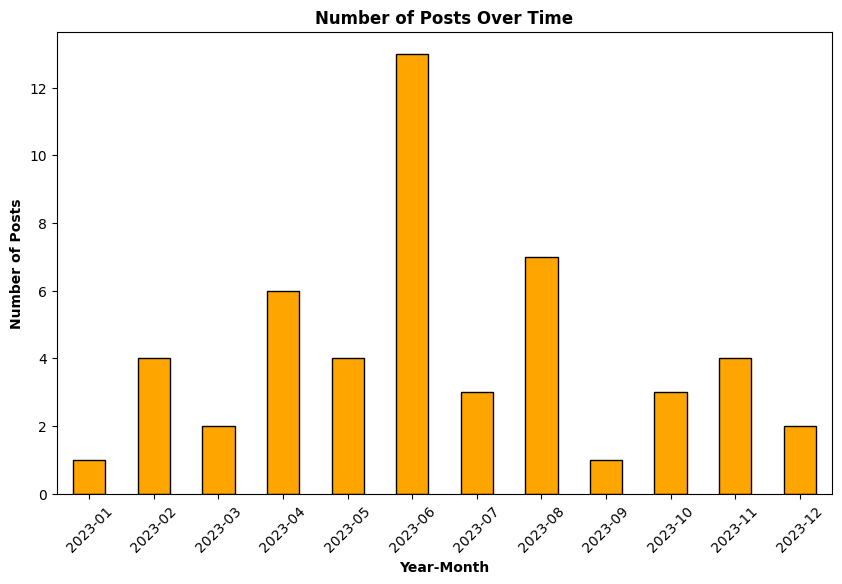

In [5]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analysis, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl

# The first step of creating a visual in Pandas is to gather values for our DataFrame.
# In this case, we are evaluating the 'timestamp' column, which is really how we can see how frequently our users post. 
# We will turn our df['timestamp'] column which is formed as a str value, into a datetime value, able to be measured and manipulated. 
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Now that we have a manipulatable data column we will dissect it further. 
# We will go from a structured format such as (yr/mth/day/hour/min), to now splitting 'timestamp' into a new column, 'Year-Month'. 
# This new column will be extracted by the 'dt' accessor that accesses the datetime values of a series, which in this case is df['timestamp']. 
# Once we have our datetime function('.dt') we will use '.strftime' to format our new data as strings.
# The format will be ('%Y-%m'), which shows the year(%Y) as YYYY and month(%m) as MM. 
# It's important to note that in order to choose a month it must be %m as this means month, while %M means minutes. 
# Now our finished function is complete, it will now format as for example: 2023-6(Year-Month)
df['Year-Month'] = df['timestamp'].dt.strftime('%Y-%m')

# We are dealing with several groups when trying to ask our question, how does the number of posts vary over time?
# Since this question requires multiple columns, we need to group our entire DataFrame('df') to calculate. 
# Using the 'groupby()' function we can combine data that has the same data found in the 'Year-Month' column and divide them all into their own little sections. 
# Additionally, using the '.size()' function will allow us to count how many elements are in each group. 
posts_per_month = df.groupby('Year-Month').size()

# Now that we have all of our values, we can construct our chart!
# This visualization will be in the form of a bar chart! Sized to 10x6 inches, each bar is lined with a sharp black, and colored in a nice bright orange!
posts_per_month.plot(kind = 'bar', figsize = (10, 6), edgecolor = 'black', color = 'orange')

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold.
mpl.xlabel('Year-Month', fontweight = 'bold')
mpl.ylabel('Number of Posts', fontweight = 'bold')
mpl.title('Number of Posts Over Time', fontweight = 'bold')

# SIDE NOTE: I chose to leave the gridlines out of this chart as they appear to take away from the visual itself.
# However, if you would like to include the gridlines, feel free! 
# Here is how to add and manipulate the gridlines: plt.grid(axis= 'y', linestyle='--', aplha=0.9).
# The 'axis' speaks on which index the gridlines will sprout out from, the line style is exactly as described, and how the lines will look!
# Lastly, the alpha is the dominance of the darkness of said gridlines, with .1-.9 being the scale. Have fun!

# To create a more appealing visual, we will rotate our x-axis ('month') by 45° to create a less crowded placement. 
# We will also take away the grid placement as we do not need it to be present regarding this data.
mpl.xticks(rotation = 45)
mpl.grid(False)

# Lastly, let's run our code and see our line chart!
mpl.show()

## <a id= 'what-is-the-maximum-minimum-and-average-number-of-likes-comments-and-shares-per-platform' ></a> What is the maximum, minimum, and average number of likes, comments, and shares per platform?

### [Home](#SocialSphere-User-Data)

**Fantastic! We can see the distribution of posts! It seems like June 2023 was our most popular month. Out of the 50 users examined, we observed a staggering 1200% increase in user engagement compared to January, which was our least popular month.**

Based on the data, it seems that specific months have significantly more or less engagement than others. Seasonal patterns are nothing new to companies; however, maintaining a constant flow of user engagement would truly benefit our company.

To boost engagement, possible solutions include creating a better homepage for app organization, advertisements and partnerships with influential individuals, seasonal giveaways, and new collaborations for different apps.

While our findings are extremely beneficial, our stakeholders are now requesting the statistical metrics for our platforms to better understand our data. In the section below, we will calculate the maximum, minimum, and average values for each numerical metric in our DataFrame. The easiest way to visualize and organize this data would be through a combination of bar charts and pivot tables.

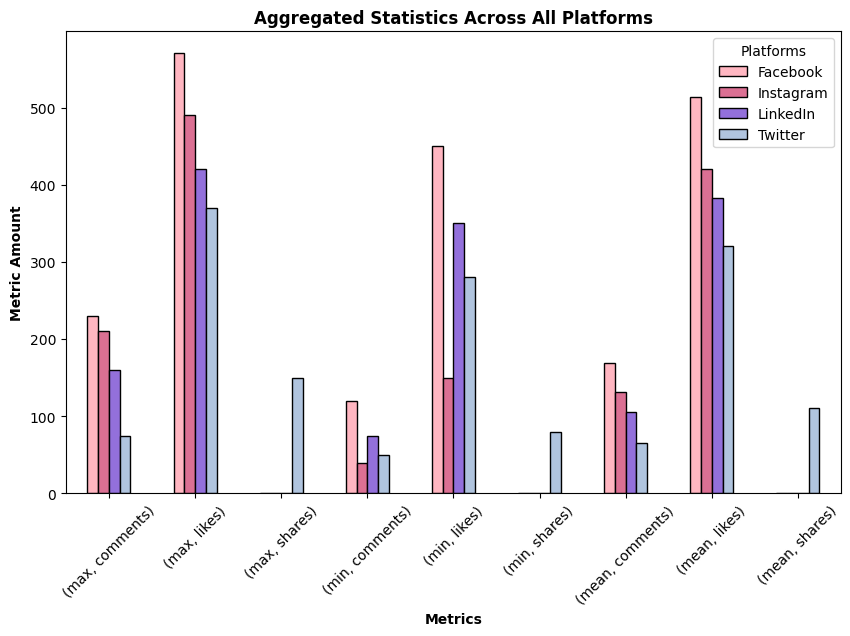

               max                   min                  mean              
          comments likes shares comments likes shares comments  likes shares
platform                                                                    
LinkedIn       230   570    0.0      120   450    0.0    169.0  514.0    0.0
Instagram      210   490    0.0       40   150    0.0    131.0  420.0    0.0
Twitter        160   420    0.0       75   350    0.0    105.0  383.0    0.0
Facebook        75   370  150.0       50   280   80.0     65.0  320.0  111.0


In [6]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analysis, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl

# In order to visualize our data, we will use a pivot table. Based on our DataFrame(df) we will create the table in the variable 'pivot_table'.
# Pivot tables have three essential factors, defining the variables that will be organized known as values, the index which will organize said values by rows, and the columns which will organize the values by column.  
# Different pivot tables have different forms, in this case, we are measuring the max, min, and average of our data.
# First we will define the values using 'values = ', in this case we are looking at the metrics(likes, comments, shares).
# After this we will define the index using 'index = ', in this case, we will group our values by 'platform'.
# Since this pivot table is measuring max, min, and average we will include the 
pivot_table = df.pivot_table(values = ['likes', 'comments', 'shares'], index = 'platform', aggfunc = ['max', 'min', 'mean'])

# Our pivot table would look far better with data that is rounded! You can't truly have .8 of a like, can you? 
rounded_pivot = pivot_table.round()

# This line will create our variable, 'pivot_table_org'.
# This variable will include our pivot table, rounded.
# Using the 'sort_values' function Pandas offers we can change the order of our pivot table.
# Organizing by max seems to be the best way to visualize our data.
# We will define our values via the 'by =' function, and the 'max', 'likes' being the values 'by =' is sorting by.
# Additionally, it seems far better to sort values by descending order as big -> small looks far more appealing personally than small -> big.
# Via the 'ascending =' function we can sort the maximum likes ordered descendingly('ascending = False'). 
pivot_table_org = rounded_pivot.sort_values(by = ('max', 'likes'), ascending = False)

# This variable will transpose our data using the Pandas ".T" function.
# This will make the pivot table vertical as opposed to horizontal.
# This step is needed since without the transposed reformation, the x-values would instead be the platforms as opposed to the metrics we are measuring.
# How can we have 500+ LinkedIn's? We transpose so the data is correctly organized in our eventual chart. 
pivot_table_transposed = pivot_table_org.T

# Prior to any chart creation, I wanted to experiment with color organization! 
# I created a palette inspired from the movie: The Grand Budapest Hotel by Wes Anderson.
colors = ['lightpink', 'palevioletred', 'mediumpurple', 'lightsteelblue']

# Now we can create our plot! We will organize our information categorically via a bar chart. 
# The most perfect display size for bar charts in Jupyter Notebook seems to be 10x6 inches so I will keep it as the standard!
# I will then import our custom color palette using the 'color=' function. 
# lastly, I like the animated look of a black edgecolor, so it will be implemented. 
pivot_table_transposed.plot(kind = 'bar', figsize = (10, 6), color = colors, edgecolor = 'black')

# Here we have our axis & title labels, we are measuring our metrics(likes, comments, shares) therefore that will be the x-axis.
# We need to display an amount if we are measuring, therefore the y-axis will be the amount concentration regarding our metrics.
# Regarding all of our labels, they will be bolded to accentuate their definition. 
mpl.xlabel('Metrics', fontweight = 'bold')
mpl.ylabel('Metric Amount', fontweight = 'bold')
mpl.title('Aggregated Statistics Across All Platforms', fontweight = 'bold')

# Due to the large volume of bars present in our chart, it's best to create a legend that will label our bars via a legend!
# The title of our legend will be 'Platforms', which will allow us to label our transposed data! 
# The legend will automatically associate with what the columns are labeled. Since our table has aggregate functions('aggfuncs') as columns it will automatically associate with whatever value is not the x-axis/y-axis.
# However, I believe the inclusion of the column in question is extremely helpful even if it is unneeded, therefore df['platform'] is included. 
# We will also set it to the 'best' location possible. 
mpl.legend(df['platform'], title = 'Platforms', loc = 'best')

# We will also rotate our x-labels 45° to not overcrowd our values. 
mpl.xticks(rotation = 45)

# We are now ready to run our code, and '.show()' our wonderful chart!
mpl.show()

# Lastly we will execute the pivot table code to show exact numerical data since the bar lacks the ability to see exact data.
print(pivot_table_org)

## <a id= 'how-do-the-distributions-of-likes-and-comments-differ-across-platforms' ></a> How do the distributions of likes and comments differ across platforms?

### [Home](#SocialSphere-User-Data)

**Look at that! Using a quad-layered bar chart in combination with a pivot table yields fantastic results. We can see the maximum, minimum, and average for all of our metrics. Incredibly interesting is that while Twitter is used the most, it doesn't top the leaderboard in terms of stats. Instead, LinkedIn is the app with the most engagement by its users on average when looking at metric popularity.**

**Additionally, it is noted that the share values are missing three other bars. This is due to the lack of the share feature for certain applications.**

Using this information, it would be quite beneficial to see the significance of the distribution of likes and comments across the platforms listed based on these metrics.

Besides answering the question, we will also employ statistical learning to understand how our platform's metrics differ from one another. Our stakeholders are interested in the data and statistics associated with our platforms. **Based on our previous data, Twitter and LinkedIn are the most different from each other, with Twitter being accessed more, while LinkedIn has a higher user engagement rate.**

Using a box chart, we will answer our question. However, using the ```scipy``` library, we will measure and document the result of a t-test as well as the p-value for both likes and comments regarding our competing platforms to determine the user engagement rate.

**A t-test will explore if there is a significant difference between the mean values of both of our groups, Twitter and LinkedIn.** Regarding a t-statistic, the result of our t-test, its absolute value is measured to indicate a result. Therefore, any value over 2 is considered to indicate a significant difference between the two groups measured.

A t-test also provides a p-value, a measurement that determines the strength of evidence against our null hypothesis. A null hypothesis is the negative of a hypothesis. For example, if we say that the user engagement rate is due to the UI of our competing apps, our null hypothesis would be that the UI has nothing to do with user engagement. Any value over the threshold of 0.01-0.05 means the null hypothesis is accepted in favor of the opposing hypothesis. Conversely, if it is under the threshold, it is considered statistically significant and is rejected in favor of the opposing hypothesis.

**Our Hypothesis: The mean number of likes and comments for all platforms is the same.**

**Our Null Hypothesis: There is a difference in the distribution of likes and comments across different platforms.**

Below we will explore this:

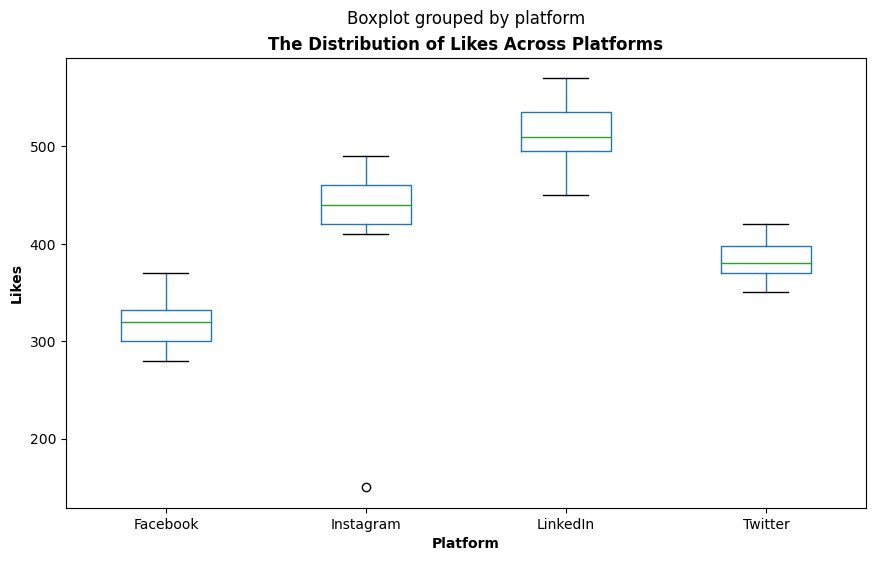

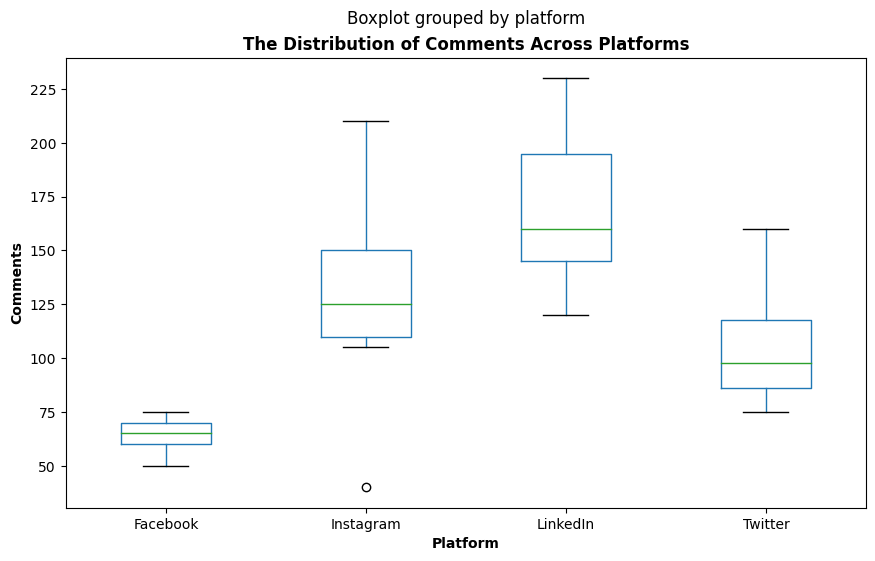

T-test for likes between Twitter and LinkedIn:
T-statistic = -12.03128247328192 | P-value = 2.0982441962684395e-11

T-test for comments between Twitter and LinkedIn:
T-statistic = -5.322808915927461 | P-value = 2.1018869348412978e-05


In [7]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analysis, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl
# Scipy library will allow us to perform advanced statistical analysis based on our data. 
import scipy.stats as stats

# SIDE NOTE: As mentioned prior in the pie chart comment, it's important to note the order of code creation.
# If the title and axes were written prior to the boxplot function, errors occur. 
# Due to the order of commands it forms the labels for a plot and then creates a new plot due to the 'df.boxplot' function.
# In our case though, because of the order, everything works out. We create the boxplot and then label it. 

# First we must define our values / create our boxplot! 
# We could define our variables and create a box plot using the '.plot()' function. 
# However, using the 'x=' & 'y=' format can also be used in the form of 'column =' 'by =' to condense the process.
# We will create a boxplot by the use of our DataFrame(df) in combination with the '.boxplot()' function which is used as a specialty as opposed to the generic '.plot()' function.
# Our values will be as described, since we are analyzing likes across platforms we can use our knowledge of the '.groupby()' function and write a similar format.
# What are we analyzing? The likes. Therefore our x value(columns) will be the 'likes' column. What are we analyzing by? Our platforms. Therefore our y value(by) will be the 'platform' column.
# Once we have our desired plot, we will create the dimensions which will be the classic 10x6 inches.
df.boxplot(column = 'likes', by = 'platform', figsize = (10, 6))

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold.
mpl.xlabel('Platform', fontweight = 'bold')
mpl.ylabel('Likes', fontweight = 'bold')
mpl.title('The Distribution of Likes Across Platforms', fontweight = 'bold')

# Once we have our boxplot created, I will customize it by rotating our platforms(xlabel) to be horizontal, for my own comfort.
mpl.xticks(rotation = 0)  
# A boxplot by default consists of a grid pattern that I personally dislike, I believe it clogs up the pattern. So we can just remove it!
mpl.grid(False)  
# Lastly we will show our finished boxplot!
mpl.show()

# Since we are looking at two factors, the distribution of likes AND comments, we will need to create a second boxplot. One with 'comments' instead of 'likes'.
# The only differing factor will be the 'column = 'comments'' instead of 'likes', and the title will be different to cater to our new focus. 
df.boxplot(column = 'comments', by = 'platform', figsize = (10, 6))

mpl.xlabel('Platform', fontweight = 'bold')
mpl.ylabel('Comments', fontweight = 'bold')
mpl.title('The Distribution of Comments Across Platforms', fontweight = 'bold')

mpl.xticks(rotation = 0) 

mpl.grid(False) 

mpl.show()

# While a boxplot is a fantastic resource to visualize the distribution of a continuous variable such as likes/comments(y-axis).
# The 'scipy' library will be used to initiate a t-test to discover if there is a correlation between our two groups.
# Since a t-test also prints a p-value, I wanted to see if we can hypothesize and use a p-value to either accept or decline our hypothesis.

# Since a t-test compares two different values, creating those values will be our next endeavor! 
# In our case, we are comparing likes and comments for two separate social media apps. Therefore we will compare likes/comments for both platforms.

# Below we have likes_twitter & likes_linkedin, this will be used to initiate a t-test to evaluate the significance of engagement when it comes to likes.
# Below we have comments_twitter & comments_linkedin, this will be used to initiate a t-test to evaluate the significance regarding engagement when it comes to comments.
# These variables consist of our DataFrame(df)'s platform column('platform') if it is equal to for example the 'Twitter' value and its corresponding 'likes'.
likes_twitter = df[df['platform'] == 'Twitter']['likes']
likes_linkedin = df[df['platform'] == 'LinkedIn']['likes']
comments_twitter = df[df['platform'] == 'Twitter']['comments']
comments_linkedin = df[df['platform'] == 'LinkedIn']['comments']

# This function will initiate our t-test and p-value. The variable t_stat and p_value will be used to keep the value and eventually implement it into an f-string.
# The stats.ttest_ind will initiate our t-test and the values 'likes_twitter' and 'likes_linkedin' will be used as the comparative values. 
# Below will be another t-test and p-value combination but conversely it will be for comments. 
t_stat, p_value = stats.ttest_ind(likes_twitter, likes_linkedin)
t_stat_comments, p_value_comments = stats.ttest_ind(comments_twitter, comments_linkedin)

# Here we have our final output, an f-string statement organizing our findings. It will show the t-test output for Twitter and LinkedIn for both likes and comments.
# We will return a newline character('\n') after the ':' and p-value output for our likes t-test, allowing for our f-string to be more streamlined.
# Let's see how it looks!
print(f"T-test for likes between Twitter and LinkedIn:\nT-statistic = {t_stat} | P-value = {p_value}"'\n')

print(f"T-test for comments between Twitter and LinkedIn:\nT-statistic = {t_stat_comments} | P-value = {p_value_comments}")

## <a id= 'What-is-the-engagement-rate-likes-comments-for-each-platform' ></a> What is the engagement rate (likes + comments) for each platform?

### [Home](#SocialSphere-User-Data)

**Amazing! Using a boxplot combined with two t-tests shows us a multitude of information. We can see that LinkedIn has by far the upper hand in engagement, especially compared to Twitter. Regardless of comments or likes, LinkedIn excels in user engagement, whether it be counted in median (lines), Q1 (bottom whisker), or Q3 (top whisker).** 

**Interestingly, the boxplot indicates that Instagram is also a top player, coming narrowly close to LinkedIn's engagement levels in the likes plot and showing a massive Q3 extension compared to others in the comments plot. It is also important to note that Twitter and Facebook seem to be the least popular apps associated with our platforms in terms of user engagement. Both platforms stayed in the same hierarchical position for both tests.**

**Regarding our t-tests, the results are fascinating. Calculating the absolute value for both t-statistics, we can see a significant result. Based on our previous data visuals and our boxplot, we have concluded that LinkedIn is the app with the most engagement. The t-test proves this, with a massive 12.03 for likes and 5.32 for comments, indicating a substantial difference in app statistics.**

**Continuing with our t-test, our p-value also indicates an interesting result. The threshold to accept a null hypothesis is 0.0-0.05. This p-value showed an extreme 2.0. Therefore, our main hypothesis is rejected in favor of our null hypothesis: there is a difference in the distribution of likes and comments across different platforms.**

Our data allowed us to see the statistical differences in platform utilization and the exact irregularities present in our users' engagement levels. Our stakeholders will benefit greatly from our findings. Possible solutions to these findings include creating a brighter and more attractive UI, updating app optimization, and creating user-specific features based on their app preference to boost user engagement.

So far, we have seen riveting information! Our stakeholders again request more information to better improve our ever-growing application. They want to see the specific engagement rate for our platforms and the amount of attention our apps get from our users.

Below, we will figure this out:

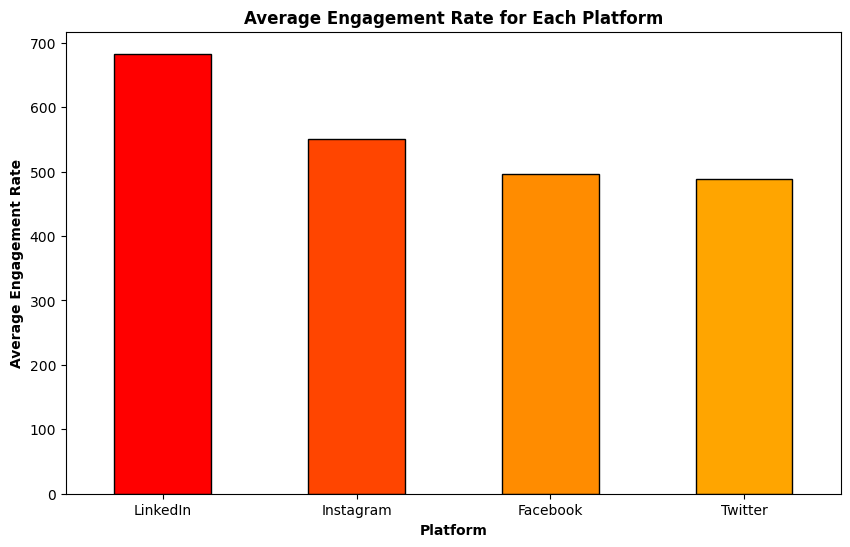

Engagment rate: 

platform
LinkedIn     683.0
Instagram    551.0
Facebook     496.0
Twitter      488.0
Name: engagement_rate, dtype: float64


In [8]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analysis, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl

# In order to organize and visualize the engagement rate of our platforms, first we must gather the value itself!
# We start off by creating a new column for our DataFrame, 'engagement_rate'.
# This will change the DataFrame's form, due to the fact that the 'df['engagement_rate']' is in the form of a column with our DataFrame present.
# This function will add the DataFrame's 'likes' as well as 'comments' columns together to form a total engagement amount. 
df['engagement_rate'] = df['likes'] + df['comments'] + df['shares']

# Once we have gathered our 'engagement_rate' data we must organize and filter it by the use of the '.groupby()' function.
# We will create a new variable titled 'eng_rate' which will use our DataFrame(df) to group each 'platform' by the 'engagement_rate'.
# We will then calculate the average amount('.mean()') in order to calculate the engagement rate, the formula would be: x + y / z.
eng_rate = df.groupby('platform')['engagement_rate'].mean()

# For the sake of organization I will also round our data, solidifying and permanently changing our variable by the use of '='.
# The data would make far more sense to have a whole number engagement rate than .81 of a like/comment. Users can't like/comment in fractionary amounts.
eng_rate = eng_rate.round()

# I will also organize our data in descending order, to make our bar chart indicate a decline from largest value to smallest.
# Defining our value, 'sorted_eng' we will use the previous value, 'eng_rate' in combination with Pandas's '.sort_values()' function to sort the values of whatever data is paired with it.
# Since our data is the default in ascending order, using the feature 'ascending =' we can change it to 'False' to indicate a descending result.
sorted_eng = eng_rate.sort_values(ascending = False)

# Prior to any chart creation, I wanted to experiment with color organization! 
# I created a red-to-orange gradient palette.
# Let's see how it looks!
colors = ['red', 'orangered', 'darkorange', 'orange' ]

# Once we have our values, we get to visualize! We will plot our values by the use of '.plot()'. 
# Our chart type will be a bar, this is because the data we provided is in the Data Type(dtype) of categorical. 
# Additionally bar chats allow for a far better visualization to compare categorical data. 
# I will then import our custom color palette using the 'color=' function. 
# We chose the standard 10x6 inches for display, colored the outline black, and to mix it up with the color I chose orchid, a nice light purple!
sorted_eng.plot(kind = 'bar', figsize = (10, 6), color = colors,  edgecolor = 'black')

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold.
mpl.xlabel('Platform', fontweight = 'bold')
mpl.ylabel('Average Engagement Rate', fontweight = 'bold')
mpl.title('Average Engagement Rate for Each Platform', fontweight = 'bold')

# In order to create an easier to read, more clean chart we will set the x-axis values to be horizontal by setting the 'rotation=0'.
mpl.xticks(rotation = 0)

# We will also take away the grid placement as we do not need it to be present regarding this data.
mpl.grid(False)

# Lastly we will show our finished plot! 
mpl.show()

# I also wanted to display the exact numerical amounts found in our 'eng_rate' variable, by printing it via an f-string.
print(f"Engagment rate: \n\n{sorted_eng}")

## <a id= 'How-has-the-engagement-rate-changed-over-time-for-each-platform' ><a/> How has the engagement rate changed over time for each platform? 

### [Home](#SocialSphere-User-Data)

Look at that! The engagement has been calculated! Every time we answer our stakeholders' questions, we get ever closer to figuring out how to increase not only our user engagement but also our user growth.

**Based on our bar chart, we can use comparative analysis to truly understand user engagement based on our 50 random users and their platforms of choice. Interestingly enough, LinkedIn takes the cake, showing a fascinating 68.3%(683/1000) engagement concentration.** 

**As previously mentioned, it is very interesting that, based on our previous analyses, LinkedIn is our least used app. Both LinkedIn and Facebook were the third and fourth choices for users in our dataset, yet LinkedIn is the most active. However, while LinkedIn is in the upper 25th percentile in user engagement, Facebook falls in the lower 75th percentile. Its engagement levels have been cross-referenced in several charts, and unfortunately, its popularity is quite low, with a 38.5% engagement concentration.** 

**Our most used apps, Instagram and Twitter, also show interesting engagement concentrations. Instagram was second in user preference and followed suit with second in engagement concentration, with an impressive 55.1%. However, Twitter seems to be the anomaly in all of our charts. Its preference was in the upper 25th percentile, yet its engagement has fallen to the bottom 50%. Its engagement concentration levels were documented at 48.8%.**

This test was very interesting, as it showed which platforms attract the most attention. However, several discrepancies are apparent. Does the engagement concentration mean users are less likely to use certain platforms, or are some users less popular than others? Do some of the platforms we are using have similar concentration amounts or vastly different ones?

Since this dataset is only 50 people, it leaves a lot to be imagined; however, in a real scenario, 10k-100k datasets are the realistic examples. Since I was unable to import the dataset, I had to resort to including an amount that could be measured but still fit on the page.

Based on our previous data, I believe that while this bar chart may not specifically clear up the misconceptions apparent, our previous and future visualizations will. I believe this chart is more of a projection than a clear answer. Our previous charts proved that user preference has no correlation to user engagement, as only a select few truly picked certain platforms. Additionally, we asked our users for their preferred app, and based on their preferences and metric amounts, we organized their data in a measurable fashion.

With so many varied questions as well as visualization types, it's hard to dismiss the idea that while these problems can be apparent, our data can't disprove the notion that popularity may be a problem as different users have different follower counts. I believe that if 12 users pick Facebook, but 6 users pick LinkedIn, on the surface, yes, Facebook is 100% more popular. When diving into our data, though, understanding possible seasonal patterns, eventual caption letter combinations, likes, comments, and shares, as well as the engagement rate, we can see that user popularity is not correlated with user engagement.

While some platforms may have more or less user preference and user engagement than others, that is beside the point. Instead, can user popularity falsely manipulate our final results? It can, but it won't. All of our questions are different and deal with different parts of our data. While some may deal with metrics, others deal with preference, time, and, as previously stated, word count and even common keywords. User popularity hypothetically can severely affect this data; however, due to the variety of questions as well as careful analysis, it won't.

Below is our next question: How has the engagement rate changed over time for each platform?

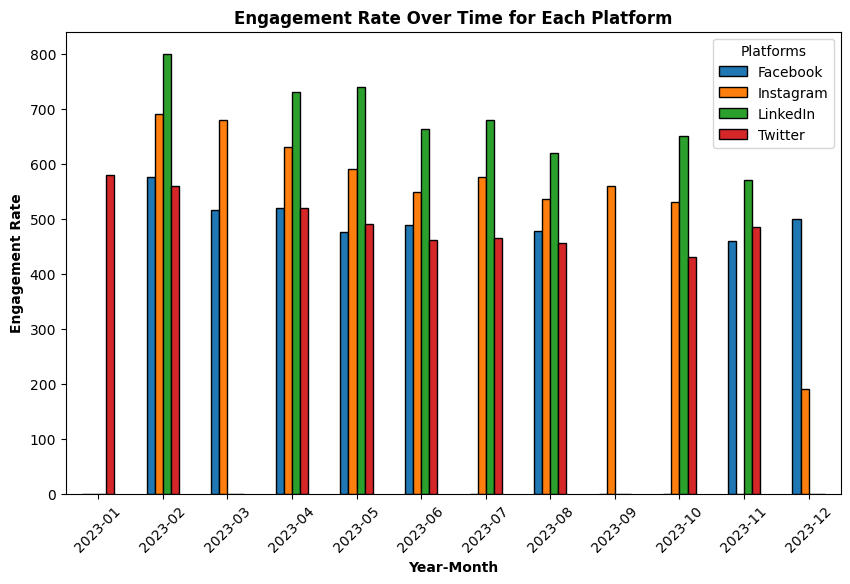

platform    Facebook  Instagram  LinkedIn  Twitter
year_month                                        
2023-01          NaN        NaN       NaN    580.0
2023-02        575.0      690.0     800.0    560.0
2023-03        515.0      680.0       NaN      NaN
2023-04        520.0      630.0     730.0    520.0
2023-05        475.0      590.0     740.0    490.0
2023-06        488.0      548.0     663.0    462.0
2023-07          NaN      575.0     680.0    465.0
2023-08        478.0      535.0     620.0    455.0
2023-09          NaN      560.0       NaN      NaN
2023-10          NaN      530.0     650.0    430.0
2023-11        460.0        NaN     570.0    485.0
2023-12        500.0      190.0       NaN      NaN


In [9]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organizaition, analyzation, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl

# We will focus on 'df['time_stamp']' column, since we have already converted it to be calculatable previously there is no need to do it again.

# Once we have converted our 'time_stamp' column we will need to isolate the most important slices of our data.
# The 'time_stamp' column is in the form: YYYY-mm-dd-HH-MM-SS-Z. 
# For this specific code, we only need the year and the month, everything else is filler information that will not be beneficial. 
# To separate the data we require we will create a new column, 'df['year_month']' which will encompass our sliced info.
# To isolate, we will use the now calculatable 'df['timestamp']' in combination with a datetime function(.dt) and '.strftime()'.
# The function, '.strftime()' will convert a selected calculatable column('df['timestamp']') and separate all of the info we need in the form which we desire.
# In this case, we would like to isolate the year as well as the month, so we will organize by year(%Y) and month(%m).
df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')

# After obtaining and organizing the desired data in our 'df['year_month']' variable we can now create the engagement rate by time function.
# We will start off by creating the variable 'time_eng_rate' which will encompass our function. 
# First, we will use our DataFrame(df) to conduct a '.groupby()' function. We will group two columns, the 'platform' column as well as the newly created, 'year_month' column.
# We are grouping by two values as opposed to one in order to create a more detailed and precise visualization by segmenting the previously defined engagement_rate column and its grouping. 
# We will split engagement_rate to not only look at the platform but as well as the time. 
# Secondly we will execute the engagement rate function which was previously defined as x + y/ z. x = platform + year_month | y = engagement_rate | z = avg(x+y).
# Lastly we will reset the index('.reset_index()'), which is commonly used after a '.groupby()' function to change the index type back into an ascending DataFrame index. 
# When grouping, the index changes to be hierarchical and the whole format becomes vertical. We reset the index to make the format go back into DataFrame form (1,2,3,4...) and convert the values horizontally.
time_eng_rate = df.groupby(['platform', 'year_month'])['engagement_rate'].mean().reset_index()

# Once we have gathered our final piece of data we can organize everything in a pivot table(pivot_df).
# We will be using a pivot table to organize our information because instead of being a categorical data set which involves 2 values, we are using multiple values as well as sorted and grouped functions.
# We will create our pivot table based on the 'time_eng_rate' variable.
# Pivot tables have three essential factors, defining the variables that will be organized known as values, the index which will organize said values by rows, and the columns which will organize the values by column.  
# For this pivot table we aren't including any aggregate functions to take the place of our columns like previously created.
# Instead, we will just organize our columns by the 'platform' column as now we can see the engagement rate over time per platform. 
pivot_df = time_eng_rate.pivot(values = 'engagement_rate', index = 'year_month', columns = 'platform')

# Additionally, I will round all data present in our 'pivot_df' pivot table so the data is exact and easier to evaluate and organize.
pivot_df = pivot_df.round()

# Once we have gathered all of the necessary data and organized it via a pivot table we can now convert it into a wonderful bar chart to visualize our now organized data.
# We will build the bar chart on top of the 'pivot_df' pivot table by using the '.plot()' function. 
# The type('kind = ') of the chart will be 'bar', the display size will be the average 10x6 inches, I will be using default primary colors to display our information, and I will color the line edges black. 
pivot_df.plot(kind ='bar', figsize =(10, 6), edgecolor = 'black')

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold.
mpl.xlabel('Year-Month', fontweight = 'bold')
mpl.ylabel('Engagement Rate', fontweight = 'bold')
mpl.title('Engagement Rate Over Time for Each Platform', fontweight = 'bold')

# Since we are dealing with several factors its best to label what each factor means, in the case of our bars they are platforms.
# In order to create a legend, we have to include the matplotlib library(mpl) and include the function('.legend()')
# Depending on the legend it's important to specify what the legend will be describing. 
# In this case with or without the 'df['platform']' the legend would still label the platforms regardless, that is because the legend automatically associates with what the columns are. 
# However, I appreciate when things are thorough as well as easily explainable/explained. therefore the inclusion of 'df['platform']' is present.
mpl.legend(df['platform'], title='Platforms', loc = 'best')

# Due to the crowded nature of our bar chart, tilting the labels by 45° to make space and make this chart just a little bit more visually appealing!
mpl.xticks(rotation = 45)

# After all of our efforts, we can now print the chart and see what the data looks like!
mpl.show()

# We will also print the pivot table just to see the more exact data.
print(pivot_df)

## <a id= 'Is-there-any-correlation-between-the-number-of-comments-and-the-timestamp-of-the-post' ><a/> Is there any correlation between the number of comments and the timestamp of the post?

### [Home](#SocialSphere-User-Data)

What fantastic information! Using our past findings on user engagement, we calculated how time can influence user engagement regarding application metrics.

***Before presenting the results of our test, we noticed an important factor that influenced our output: some months showed a lack of platform usage. For example, in January 2023, every app except Twitter showed minimal usage. This lack of data explains why NaN appears throughout the table. Conversely, some months, such as June 2023, had complete data. To ensure steady results, we will disregard months that didn't have full app usage.***

**Based on the bar chart we manipulated to fit our criteria, and even without our criteria, we can see a steady decline in user engagement over the following months. It seems our peak month was February 2023, with an average engagement rate of about 623 points. Our top engager that month was LinkedIn, with 800 engagement points. Our lowest was Facebook, with 445 engagement points.**

**Over the course of 2023, we observed a trend of steady decline with minor increases every 2-3 months, only to decline again. For example, LinkedIn, the top annual engager, saw its 800 engagement points from February decrease to 570 by November.**

**Possible reasons for a downtrend in engagement levels include seasonal patterns, weather, emotional patterns, or a preference for physical interactions over virtual ones.**

**Based on these potential reasons, we may need to invest heavily in general advertisements on television, email, and billboards to keep the idea of virtual connections apparent. Additionally, an ad campaign embracing the power of mental health and physical interaction is a better idea than one detesting it. We can also improve optimization and include newer features, sparking interest not only in our UI but in the app itself.**

**Now that we have analyzed our data and identified potential problems and solutions, it's important to understand if there is a correlation between engagement rate and time. Below, we will explore whether there is a trend regarding engagement type and comments over time. It's important to see how isolated variables may reveal specific data that would be missed if combined or grouped.**

hrough the use of a scatter plot and ```SciPy's``` ability to calculate a Pearson correlation coefficient, we will dissect the statistical data to answer the question: Is there any correlation between the number of comments and the timestamp of the post?

A Pearson correlation coefficient (PCC) is a statistical measure used to calculate the linear relationship between two variables. Additionally, it assesses the measured strength and direction of this relationship. It is measured on a three-part scale: -1, 1, and 0.

A PCC result nearing -1 demonstrates a perfectly negative linear relationship. A result nearing 1 indicates a perfectly positive linear relationship. Lastly, any number closer to 0 indicates no linear relationship between the two variables. If the number is between any integer, the result can be seen as moderate.

In addition to a Pearson correlation coefficient, we will also use a p-value to determine the strength of evidence against our null hypothesis. As previously stated, any value over the threshold of 0.01-0.05 would result in the null hypothesis being accepted in favor of the opposing hypothesis. Conversely, if it is under the threshold, it is considered statistically significant and is rejected in favor of the opposing hypothesis.

**Our Hypothesis: There is no correlation between comment creation and time.**

**Our Null Hypothesis: There is a correlation between comment creation and time.**

Below we will explore this:

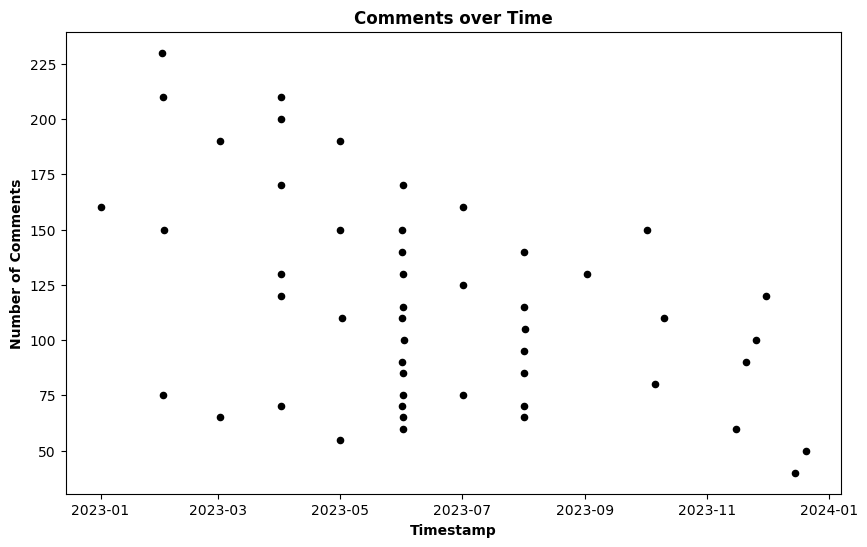

Pearson Correlation Coefficient: -0.47277808301852337
P-value: 0.000526317393027618


In [10]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organizaition, analyzation, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl
# Scipy library will allow us to perform advanced statistical analysis based on our data. 
# The pearsonr module will allow to us measure linear correlation. 
from scipy.stats import pearsonr

# We will be evaluating comments by timestamp.
# Since we have already converted our timestamp previosuly to a measurable column, 
# we can either format our data via the 'value.plot()' function or manually input our (x,y) values.
# In this case we will manually enter our x and y values. 

# First we will create our plot via the DataFrame(df) + '.plot()' function. 
# Inside our function we will organize the type('kind =') which will be 'scatter' to measure the correlation between two variables, scatter plots are a fantastic visualizer.
# Next we will create our labels, like previously mentioned above in our intro information paragraph, the values of scatter plots represent the comparative variables. 
# In our case we are trying to see the correlation between the number of comments over time. 
# Therefore we will label our x-axis: 'timestamp' since the x axis represents what we are measuring over. 
# Following this we will label our y-axis: 'comments' since the y axis represents what we are measuring. 
# Additionally we will display our scatter plot at the classic 10x6 inches, with the dots colored in black. 
df.plot(kind = 'scatter', x = 'timestamp', y = 'comments', figsize=(10, 6), color = 'black')

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold.
mpl.xlabel('Timestamp', fontweight = 'bold')
mpl.ylabel('Number of Comments', fontweight = 'bold')
mpl.title('Comments over Time', fontweight = 'bold')

# Now that we have organized our plot, we can show it! 
mpl.show()

# As mentioned above we will import the pearsonr library from scipy.stats.
# Using this library it automatically calculates the Pearson correlation coefficient and a p-value based on the data inputted.
# I believe that with the help of the PCC as well as the p-value we can decipher the trend and overall understand the scatter plot far better with this inclusion.
# We will start off by defining our two variables, 'pcc' in regard the Pearson correlation coefficient and p_value in regard to our p-value.
# Once we have our defined variables we will conduct our tests using the 'pearsonr()' function.
# Inside the 'pearsonr()' function we will include what columns we will like to test for correlation.
# First we will import our original timestamp column, since we never permanently changed the 'df['timestamp']' column to be a datetime column, its still in its string format.
# Pearsonr requires numerical data to conduct a correlation, due to this we must convert the datetime string into a calculable integer. 
# Using the '.astype()' function we can change the datatype to fit the parameters of the 'pearsonr' function. 
# Normally we would convert the dtype to 'int' but since the df['timestamp'] function has timestamp values specifying between default(8), 32, and 64 bit will allow us to optimize our data better.
# The larger the bit value(32,64) the better representation of larger timestamp values. 
# Lastly we will need another variable to conduct a correlation with 'df['timestamp']', in this case we are seeing if there is a correlation between comments and time therefore our next correlating factor is 'df['comments']'.
pcc, p_value = pearsonr(df['timestamp'].astype('int64'), df['comments'])

# The pearsonr library automatically calculates the pcc and p-value, therefore no need to manually calculate.
# Below we will print our findings via the 'print()' function and f-string literal. 
print(f"Pearson Correlation Coefficient: {pcc}")
print(f"P-value: {p_value}")


## <a id= 'Do-posts-with-longer-captions-tend-to-get-more-engagement' ></a> Do posts with longer captions tend to get more engagement?

### [Home](#SocialSphere-User-Data)

Great! Using both statistical analysis as well as visualization we were able to decipher the relatiosnhip between comments and time. 

**Based on our scatter plot we can see a such an interesting result. Firstly, the scatter plot is leaning down, indicating a negative result. Over time the comment amount declines. Secondly, the scatter plot is not condensed, instead it is spread out indicating a moderate-null correlation. Lastly, there seems to be several vertical lines present throughout the plot, indicating a lack of correlation between time and comment amount.**

Using the plot we can conclude our answer to the question, however it's important to have several references to ensure our data is correct. Calculating the Pearson correlation coefficient(PCC) as well as p-value will allow us to statistically analyze our data and truly understand the correlation.

**Below our chart we can see the results. Using the ```pearsonr``` function we can automatically calculate our PCC & p-value when it comes to analyzing the correlation of time & comments. Regarding the PCC result, our data exhibits a -0.47 which is in the middle of the threshold -1 and 0. This result indicates a moderately negative linear(-1) result with an emphasis on a lack correlation(0).**

**Regarding our p-value, our data displays a 0.00052 which is far below the threshold of 0.1 - 0.5. Due to the result being below the threshold, our hypothesis: "There is no correlation between comment creation and time" is accepted.**

**After both visual proof as well as statistical analysis and results we can see a fully formed hypothesis and result. Our data has a majorly lack of correlation between time and comment production. This indicates that regardless of the title, comment production is unaffected.**

Based off this data, we do not need to factor in timestamp to understand why our viewership may be declining. This is great as it narrows down possible problems, and allows to focus on future questions. 

Regarding engagement, captions are a fantastic indicator to see what our users care about and if certain keywords affect the SocialSphere algorithm. However, prior to the analyzation of words, we must analyze the characters themself. Does the length of our user's captions gather relate to engagement rate? 

We will calculate this as well with the correlation of our two variables, length & engagement rate. To calculate correlation we will use our ```scipy``` library and their Pearson correlation coefficient as well as the p-value feature.

A Pearson correlation coefficient(PCC) is a statistical measure used to calculate the linear relationship between two variables. Additionally, it assesses the measured strength and direction of said relationship. It's measured on a three-part scale, -1, 1, 0.

The PCC result nearing -1 demonstrates a perfectly negative linear relationship. A result nearing 1 indicates a perfectly positive linear relationship. Lastly, any number closer to 0 indicates no linear relationship between the two variables. If the number is in between any integer, then the result can be seen as moderate.

In addition to a Pearson correlation coefficient, we will also use a p-value to determine the strength of evidence against our null hypothesis. Like previously stated, any value that is over the threshold, .01-.05 would result in the null hypothesis being accepted in favor of the opposing hypothesis. Conversely, if it is under the threshold than it is considered statistically significant and is rejected in favor of the opposing hypothesis.

**Our Hypothesis: Longer captions tend to have a higher engagment rate compared to short captions.**

**Our Null Hypothesis: Caption length has no affect on engagement rate.**

Below we will explore this:

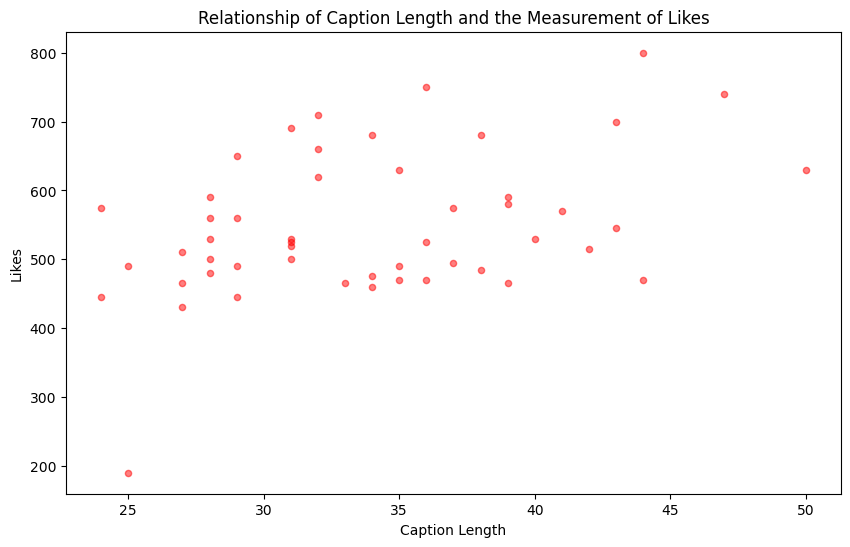

Pearson Correlation Coefficient: 0.35913667749633577
P-value: 0.010427278455139008


In [17]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organizaition, analyzation, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl
# Scipy library will allow us to perform advanced statistical analysis based on our data. 
# The pearsonr module will allow to us measure linear correlation. 
from scipy.stats import pearsonr

# Columns themselves in Pandas are known as Series, which are one dimensional arrays of data capable of holding any type. 
# However, if we tried to find the length of each caption in our Series(df['caption']) the string method('.len()') would apply itself directly on top of this one dimensional array instead of inside with its values.
# To manoipulate the values itself we would need to provide an accessor known as '.str'.
# This accessor('.str') will allow us to access any of the str values present in the Series('df['caption']') and allow us to perform string methods on top of our values. 

# To start off we will define the values in which we will evaluate.
# We are going to make a new column titled 'caption_length' in our DataFrame('df').
# This column will be defined by using our 'caption' column which houses our captions. 
# To access the string values we will use the '.str' accessor to intercept our column and access it's values.
# Once we have access to the values we can figure out the length of every single caption by the use of '.len()'.
# This function simply calculates the length of every single word and outputs the character amount for the values its associated with. 
df['caption_length'] = df['caption'].str.len()

# Once we have our values defined we can simply plug it in to our '.plot()' function.
# Using the '.plot()' on our DataFrame('df') directly we can organize the (x,y) values manually as opposed to using the '.plot()' on a variable. 
# Since we are finding correlation: Does caption length correlate to more engagement? 
# Our plot type('kind =') will be 'scatter' as in scatter plot. 
# We need to define the (x,y) values, with x and y being the relationship of these values. 
# In this case, our labels will be the length of our captions('caption_length') and we will compare this with our values which we will the rate of engagement('engagement_rate').
# Once we have our values, we can manipulate the visuals our liking. 
# I will display('figsize =') the plot at 10x6 inches. The color('color =') will be red. Lastly, the opacity('alpha =') will be turned down to half('.5') to show any overlapping points. 
df.plot(kind = 'scatter', x = 'caption_length', y = 'engagement_rate', figsize = (10, 6), color = 'red', alpha = .5)

# Once we have our values and plot structure, we can personalize it via the x-axis('.xlabel()'), y-axis('.ylabel()'), and title('.title()') customization.
mpl.xlabel('Caption Length')
mpl.ylabel('Likes')
mpl.title('Relationship of Caption Length and the Measurement of Likes')

# Lastly we will '.show()' our finished plot.
mpl.show()

# Due to the fact we are correlating between two variables, the 'scipy' library would be an excellent inclusion to calculating specifics!
# Correlation can be calculated by the use of a Pearson correlation coefficient as well as the p-value.
# The 'pearsonr()' function calculates both values automatically once our values are inputted.
# The output of the 'pearsonr()' function results in the PCC first followed by the  p-value, to keep an organized environment we will define our variables in the correct order. 
# Inside of our 'pearsonr()' function we will input our first value which we have created which is the column: 'caption_length' from our DataFrame('df').
# This function requires a higher bit concentration due to the memory requirements taken from a complicated calculation such as 'pearsonr()'.
# Using the '.astype()' function we can change the datatype to fit the parameters of the 'pearsonr' function. 
# Inside the '.astype()' function we will change the bit type by inputting 'int' as in integer and '64' as in 64 bit. Therefore the datatype will be convereted into a 64-bit integer data type.
# Lastly we will need to compare another value and in our case its the 'likes' column from our DataFrame('df').
pcc, p_value = pearsonr(df['caption_length'].astype('int64'), df['likes'])

# Once the 'pcc' & 'p_value' have been calculated we can now organize it via the 'print()' function as well as an f-string.
print(f"Pearson Correlation Coefficient: {pcc}")
print(f"P-value: {p_value}")

## <a id= 'Are-there-any-common-keywords-in-the-captions' ></a> Are there any common keywords in the captions?

### [Home](#SocialSphere-User-Data)

Fantastic! Using both statistical analysis as well as visualization via a scatter plot we are able to calculate the correlation between caption length and the measurement of likes. 

**Based on our scatter plot we can see several outcomes immediately. Firstly, our whole entire plot is angled up, from left to right. This indicates a positive correlation between our variables. Longer captions do in fact indicate a higher concentration of likes. Secondly , the scatter plot has the form of of a line, however is not majorly condensed. This indicates a moderate-weak correlation between our variables.**

**It's also important to note that there are several vertical lines throughout our data, this affects correlation and indicates a weaker correlation. Additionally, due to several data points either being on top of in eachother, the opacity of the plot was lowered to truly visualize the different data points present.**

While the plot is extremely effective at indicating the result from our testing, including other references such as statistical analysis via the PCC & P-value can help deepen our understanding. 

**Below our charts we can see the results of our analysis. The PCC shows a result of .35 which is in the middle of the threshold of 0 and 1. This result indicates a weak correlation(>0) that is moderately linear(<1).**

**Our p-values's result of .01 is below the threshold to accept our null hypothesis: Caption length has no affect on engagement rate. Therefore our hypothesis is accepted, longer captions tend to have a higher engagment rate compared to short captions!**

After both visual evidence as well as statistical analysis we can construct our whole result. The relationship between longer captions and likes is a positive all be it weak linear correlation. 

This data is extremely interesting, it seems like we should advocate for our users to write more when it comes to reaching a wider audience. Based off our users, we see that they prioritize a more linguistic user and appreciate expression through words. We can use this information to possibly advocate for an increase in the character limit to offer greater opportunity for more expression. 

Now that we can see how caption length affects a wider audience, are there other caption related factors that might do the same? 

Below we will explore if inside of our captions, certain keywords are more prominant than others. Eventually we will use this information to see if user engagement is affected by these common words: 

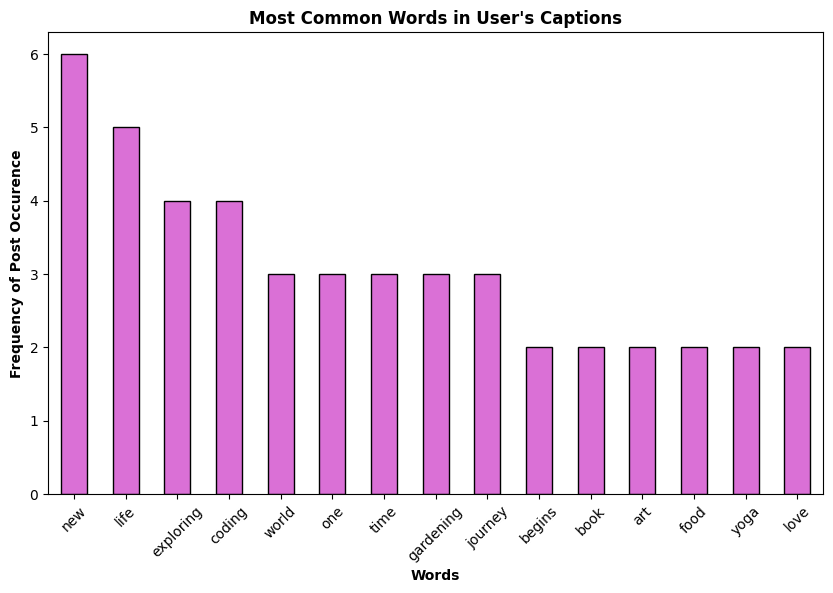

Data that has not been stacked:

         0         1      2     3     4     5
0    check    latest   blog  post  None  None
1  feeling  grateful  today  None  None  None



Data that has been stacked:

0  0            check
   1           latest
   2             blog
   3             post
1  0          feeling
   1         grateful
   2            today
2  0       networking
   1       likeminded
   2    professionals
3  0        exploring
   1              new
   2     technologies
dtype: object


In [10]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organization, analyzation, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts/plots.
import matplotlib.pyplot as mpl
# re library will allow us to work with regular expressions(re) and manipulate strings far more effectively than any normal function. 
# Using patterns we can search, replace, and extract portions of text. 
import re

# To start off, we are going to orchestrate a function that will eliminate any characters unable to be evaluated, mainly emojis and any non-standard characters.
# We will first define(def) our function and title it 'cleaned_text'. This function will analyze and manipulate any text inputted inside the ().
def cleaned_text(text):
    
# In order to accurately measure unique keywords, we first must exclude words that are more or less necessary for sentence cohesion.
# Any word that is either an article, preposition, or conjunction will be removed. 
# In order to do this all we have to do is create a variable which encompasses a list of all words we would like to remove.
    exclusions = ['a', 'about', 'above', 'across', 'after', 'against', 'along', 'among', 'and', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'but', 'by', 'despite', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'is', 'its', 'let', 'lets', 'like', 'my', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'our', 'past', 'regarding', 'round', 'since', 'the', 'through', 'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'up', 'upon', 'with', 'within', 'without', 'your']
    
# We will then indent and create the 'cleaned_txt' variable which will house our cleaned data. 
# Using the 're' library we will work to pattern match our data and replace the advanced characters with nothing("").
# Using the re module as opposed to the '.replace()' is far more effective. While '.replace()' can handle simple characters such as punctuation, vowels, numbers, etc. re can use pattern matching to do all of the above as well as handle sophisticated characters. 

# Our 'cleaned_words' variable will use the 're.sub()' function which can substitute patterns within a given string for a replacement string.  
# In our case we will create a regular expression using(r''). 
# In this expression we are going to say that we want to replace all characters that are NOT('[^]') word characters('\w'), whitespace characters('\s'), or("|") an underscore('_').
# We will also use the '.lower()' function to make all words the same format since some words either started the sentence or ended.
# Then we will include our 'exclusions' variable following our 're' input via an iteration('for'). 
# The iteration will state that for every word in our input, we will split the input into a list where each value is separated by white space.
# Without the '.split()' our input would be treated as one humongous single string, and when it iterates each letter would be returned as a result.
# If the words which are converted to lowercase from our newly created input list is NOT in the exclusion list we will return ONLY those words. 
# We will then replace all characters that fit our requirements(r'[^\w\s]|_') combined with the result from our iteration, and then specify which data we are trying to clean, which is our 'text' variable.
    cleaned_words = [re.sub(r'[^\w\s]|_', '', word).lower() for word in text.split() if word.lower() not in exclusions]

# Once we have our cleaned data, instead of leaving it in the list format, we will use the '.join()' function and separate each word with a space(" ").
# Inside the '.join()' parenthesis we will input our newly formed 'cleaned_words' variable, and force each word to be lowercase.
    cleaned_txt = ' '.join(cleaned_words).lower()

# Lastly, we will use the 'return' function which will print and completely exit out of our function.
# We will return our newly cleaned text, excluding emojis and words from our 'exclusions' variable.
    return cleaned_txt
 
# Once we have the function that will clean our data, we must provide the data to be cleaned!
# First, we will create a new column, titled 'df['filtered_cap']' which will house our filtered data manipulated with our 'cleaned_text()' function.
# Our 'cleaned_txt' function needs text to iterate, which will be our column, however, it's a little more complicated to iterate through a column as compared to a normal series, list, or tuple.
# For a series, tuple, or list, using a for loop can directly iterate through each element. 
# However for a column, we will need to either use list comprehension such as in our 'cleaned_words' variable, a for loop with '.append()', or simply the '.apply()'.
# The '.apply()' function takes a custom-defined function or lambda function and iterates it directly onto the elements of the column.
# This line will use the 'df['caption']' column and using the Pandas function, '.apply()' we can easily just apply our 'cleaned_text()' function to the column('df['filtered_cap']'). 
df['filtered_cap'] = df['caption'].apply(cleaned_text)

# Once we have our newly filtered column, 'df['filtered_cap']' we must count the words in order to find the amount of frequency.
# In order to do this we will extract all of the words in the 'df['filtered_cap']' column and store them separately in a series. 
# We will call our series 'ext_words', as in extracted words. 
# To start this process we will start by creating the series 'ext_words', which will house our code.
# We will input our 'df['filtered_cap']' column, and include the Pandas .str accessor. 
# This accessor will allow us to only manipulate string elements in a series. We will use this to eliminate any count of numbers, punctuation, or symbols. 
# Once we have our limits set, we will split each user's caption into a list of words separated by white space.
# Including the 'expand = True' will help us organize our data by forcing this listed data to be organized via new columns in our DataFrame. 

# If the 'expand' = 'False' then processing our data would be difficult since it would keep our data into a list format and no longer organized via columns. 
# If you would like to process lists, use list comprehension, or possibly maintain the structure of your data via a list, 'expand = False' is an excellent choice!
# However, for this project, 'expand = True' will be used to conduct further analysis and processing tasks. 

# Lastly, we will use the Pandas function .stack(). 
# This will reshape our data and pivot our column labels to be far more organized. 
# Without the .stack(), each column would have a separate word from each caption, and the index would be tracking each word. 
# With the .stack() it will pivot the column labels to be part of the index.
# Each column label will now be organized more efficiently, with each column having an inner index.
ext_words = df['filtered_cap'].str.split(expand = True).stack()

# To better visualize how effective the '.stack()' function is I have created an alternative copy of our 'ext_words' series.
# This will be appropriately titled, 'no_stack' and will feature the same code unstacked.
no_stack = df['filtered_cap'].str.split(expand = True)

# Once we have our organized data via the 'ext_words' series we can now conduct the count function that will show the number of occurrences per each word.
# The variable will be titled 'word_count'. It will contain our 'ext_words' variable and be aggregated with the .value_counts() function.
# The .value_counts() function will use the variable provided, in this 'ext_words' and count every single occurrence of each of the values present in said variable.
# Now we have the values for our plot! 
word_count = ext_words.value_counts()

# Now that we have our values via 'word_count' we can construct our plot.
# Due to the fact that there are hundreds of unique words in this data, we can use the '.head()' function to select the most popular values.
# We will select the top 15 to not clog this chart while also showing which values can possibly make a difference in algorithmic attention.
# We will select the plot type('kind') as 'bar', display('figsize') as 10x6 inches, color('color') as 'lightseagreen', and our bar border('edgecolor') as 'black'.
word_count.head(15).plot(kind = 'bar', figsize = (10, 6), color = 'orchid', edgecolor = 'black')

# Lastly we will label our bar chart. 
# Since we are measuring words and their frequency, the x value will be the words themselves and the y value will be the frequency.
# lastly our title, which will be "Most Common Words in User's Captions". 
# We will also bold each value to organize any clogging. 
mpl.xlabel('Words', fontweight = 'bold')
mpl.ylabel('Frequency of Post Occurence', fontweight = 'bold')
mpl.title("Most Common Words in User's Captions", fontweight = 'bold')

# To create an organized environment I will also rotate our x-values by 45° as opposed to 0° which may cause an overlap on some words.
mpl.xticks(rotation = 45)

# Lastly we will show our wonderful bar!
mpl.show()

# Additionally, like mentioned prior I wanted to show the effect '.stack()' has on the data and our graph. 
# Using the 'print()' function as well as f-strings, we can make our code easy to organize and understand.
# The '.head()' function will also be used to not clog our notebook since the data we are dealing with is quite large. 
# Focusing on organization, the newline character('\n') sequence will be used to create several spaces between data to allow a freeform open environment. 
# Below we will explore the differences.
print(f"Data that has not been stacked:\n\n{no_stack.head(2)}\n\n\n")
print(f"Data that has been stacked:\n\n{ext_words.head(13)}")

## <a id = 'Do-certain-keywords-have-a-trend-of-higher-engagement' ></a> Do certain keywords have a trend of higher engagement? 

### [Home](#SocialSphere-User-Data)

**Based on our findings it seems that there are several non-prepositionary, non-conjuctionary, non-article, non-pronoun, and non-second/third person verb that appears more abundantly than normal throughout the DataFrame that might cause a possible increased algorithmic boost. These words include the top 15 words above from "new" to "love".**

**Looking at the frequency we can see that our leading word in terms of the hierarchy of frequency is the word "new", with 6 occurences out of 50, or 12% of our total userbase's unique words. In our top 15, the words with the least amount of popularity would be a set: "begins", "book", "art", "food", "yoga", and "love". These words all contribute to 4% each or 24% all for our userbase's total unique words.**

**Based on our data it seems that words that relate to a more adventurous and exploratory mindset seem to be used more by our users. Words such as "new", "life", and "exploring" are used more frequently than others, accounting for 30% of our users unique word inclusions.**

**This data is extremely helpful to analyze, it indicates that our users are more life and hobby oriented individuals. This can allow us the opportunity for a more expressive ad campaign focusing on the journal and photo documentation of the platforms we support.**

Now that we see how common some keywords are, it would be extremely important to dive further. Does the SocialSphere algorithm get affected by these common keywords? If so which words are affected the most? If not, what does the negative data imply?

Below we will explore the idea of possible algorithmic enhancement by the use of common keywords: 

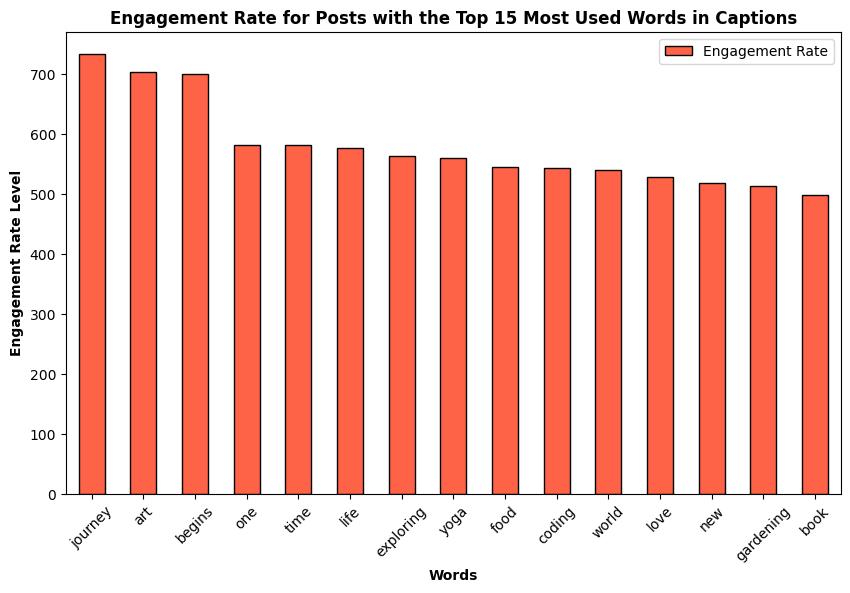

The average engagement rate for the top 15 most commonly used words is: 527.5




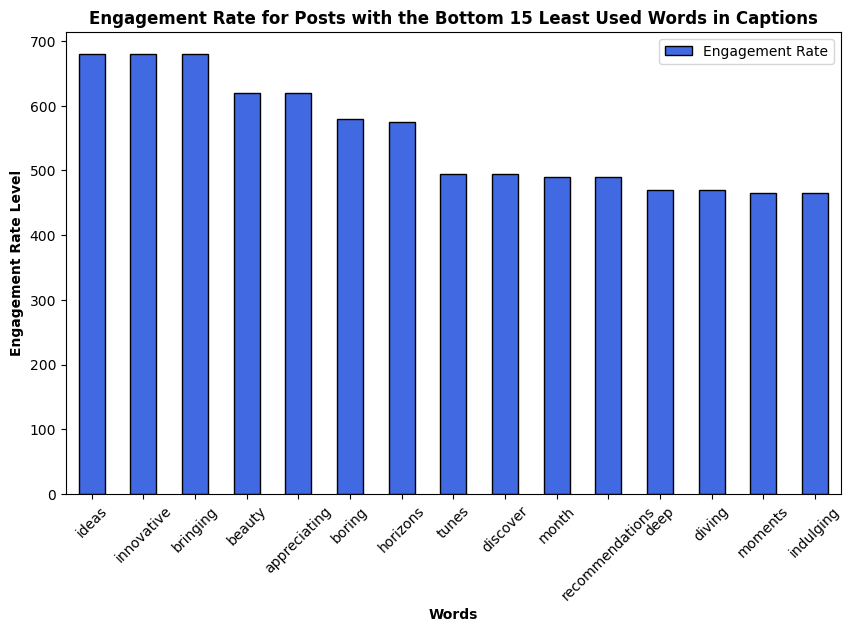

The average engagement rate for the bottom 15 least commonly used words is: 580.0




In [11]:
# Pandas library will allow us to organize data in a DataFrame, as well as manipulation, organizaition, analyzation, and visualization. 
import pandas as pd
# Matplotlib library will allow us to create advanced visualizations and organize our data through colorful charts / plots.
import matplotlib.pyplot as mpl
# re library will allow us to work with regular expressions(re) amd manipulate strings far more effectively than any normal function. 
# Using patterns we can search, replace, and extract portions of text. 

# To start off we will define our values in the variables top_words & bottom_words. 
# We are going to want to show if certain keywords have a trend of higher engagement so limitting our results to the top/bottom 15 will be our first step.
# Using our previous function: 'word_count' we will select all of the words and show their frequency.
# We will also use the '.head()' & '.tail()' function to limit our result to the top/bottom 15.
# Adding onto our result we will include the function '.index' to include the index labels which are the words themselves in a list form.
# This format will be beneficial for the visualization aspect in Matplotlib. 
top_words = word_count.head(15).index
bottom_words = word_count.tail(15).index

# Once we have our top words, organized via index and values we can process each value and assign an enagagement rate per each word. 
# First we will create an empty dictionary to eventually organize our keys(top_words) and values(engagement rate)
top_eng_rate = {}

# A for loop will be initiated to iterate through each word in our top_words function. 
for word in top_words:

# Inside of our loop we will filter our DataFrame('df') using the variable filtered_df.
# Inside of our varable we will select our DataFrame('df') and target its rows by grabbing the DataFrame('df') and first inputting '[]' next to it. This will target the columns.
# Next, we will need to target the rows of our selected column which in this case will be our 'filtered_cap' column which has been cleaned to expel any non-standard characters.
# This column houses all of our words, to focus on the rows in a column we will insert the column name in another pair of '[]' inside of our original brackets.
# This will allow us to focus only on every row of our 'filtered_cap' column in our loop. 
# Then we can target these words and use boolean indexing('[]') to select the 'filtered_cap' values' rows and output any results that indicate a 'True' result.
# Once selecting the column we would like to index, we are going to loop over every single row in the column and select only the '.str' values that '.contains' each 'word' in our 'top_words' variable. 
# This will allow us to create an organized variable which houses a new DataFrame('filtered_df').
# In this DataFrame it will house every column as before, but include a new column that takes all the data we have now iterated over, analyzed, and cleaned and input it into this column. 
    filtered_df = df[df['filtered_cap'].str.contains(word)]

# Once finished filtering our dataframe and outputting our top 15 words we are fine to create our engagement rate values.
# Prior to this function we calculated the engagement rate for our question: "What is the engagement rate (likes + comments) for each platform?"
# The difference is, we are not directly manipulating our main DataFrame(df) instead we have created a whole new DataFrame('filtered_df') that we will use to calculate.
# This DataFrame('filtered_df') is created the minute we launch the loop, and for each word it will update the DataFrame 15 times over until it is filled up with the top 15 words and its associated engagement rate. 

# To calculate the engagement rate we will first differentiate our variable for clarity sake, titling it 'top_engagement_rate'. 
# This variable will house our newly created DataFrame('filtered_df') and its associated metrics for engagement rate calculation. 
# The MAJOR difference that cannot be left out is the '.sum()' function.
# This line calculates the engagement rate for each row(word) respectively for each metric.
# The necessity is the '.sum()' function which can either be included here or below, however it must be included to eventually calculate the engagement rate for each post for each word.
# The '.sum()' function will conglomerate each metric seperately then combine the result into one massive sum for that word. EX: 15(likes) + 15(shares) + 15(comments) = 45(eng rate). 
# The point of this massive sum is to eventually divide this amount by post amount per word and create an accurate engagement rate.
    top_engagement_rate = filtered_df['likes'].sum() + filtered_df['shares'].sum() + filtered_df['comments'].sum()

# Once have gathered the engagement rate for all of our words, we can now gather each of our users. 
# The variable 'total_posts' will be used to calculate the total number of user encounters throughout the DataFrame('filtered_df').
# To find the total posts of our DataFrame('filtered_df') we will evaluate the structure of the rows and colums of our DataFrame by the '.shape()' function.
# In this loop, the '.shape()' function will output the row and column amount. 
# Rows indicate how many times a value is observed, while columns indicate how many unique values are in the dataset. 
# Rows are usually isolated to find ocurrences, while columns are used to understand the structure and width. 
# For our problem we are trying to evaluate occurences, how many posts are there? In this case we will isolate the rows via [0].
# This step is pivotal for calculating our engagement rate since we will find the occurences of each of our words in our loop and then divide each word separetly by the total occurences of themself. 
    total_posts = filtered_df.shape[0]

# Now that we have our engagement rate as well as our total post amount, we can divide these amounts to discover an engagement level for each word in our loop. 
# Using the eng_rate variable we will divide the engagement rate value('top_engagement_rate') by the total post amount('total_posts'). 
    eng_rate = top_engagement_rate / total_posts

# Lastly we will update our dictionary, 'top_eng_rate' with the results from our eng_rate function! 
# To make sure the dictionary has the correct order of key-values, we will include '[word]'.
# This will make the dictionary knows that our iterated words are the keys while the 'eng_rate' is the value.
# Doing this will cause top_eng_rate to absorb the form of eng_rate and becomes its own dictionary, with words as keys and engagement rate as values. 

# Rather than making the dictionary('eng_rate') itself = values('top_eng_rate[word]') it would be the other way around due to the nature of our values which is dynamic.
# When iterating or calculating values, the values can be changed, which means they are dynamic and not predetermined. 
# If we create an already static, or predermined key:value relationship then we would write it: eng_rate = top_eng_rate[word].
# However, due to the nature of the ever changing values in our for loop, we would implement our values into the structure as opposed to the structure initially surrounding the values. 
# When static: eng_rate = top_eng_rate[word], dictionary surrounds predermined values. 
# When dynamic:  top_eng_rate[word] = eng_rate, values insert themselves into structure.
    top_eng_rate[word] = eng_rate

# After calculating the values of engagement rate for our words and creating our brand new dictionary('top_eng_rate')
# We can now build our visualization to organize our data in an appealing way. 
# We can either manipulate our original DataFrame(df) by using a for loop to append custom made lists and inserting inside of our DataFrame(df) via a dictionary.
# However, it seems to be far more concise and cleaner to create a separate DataFrame('engagement_df') instead of manipulating our original DataFrame('df').
# This new DataFrame('engagement_df') will only consist of our words and their respective engagamnent rates. 

# Once our variable is defined, we will create the DataFrame with the 'pd.DataFrame()' function. 
# Since we are creating a DataFrame out of a dictionary, we will need to convert our values into a list of tuples. 
# DataFrame's work by organizing a list of tuple values and organizing them based off column name, however as of right now the format of our data is in a dictionary titled ' top_eng_rate'.
# To convert our data we simply surround our values which in this case is our 'top_eng_rate' dictionary in the 'list()' function. 
# Then we will use the '.items()' function to convert our listed dictionary into a list of tuple values. 
# Once we have our converted data we can label our columns with the 'columns =' function and due to multiple values, surround them by '[]'. 
engagement_df = pd.DataFrame(list(top_eng_rate.items()), columns = ['Words', 'Engagement Rate'])

# Now that we have our brand new DataFrame, we will organize and manipulate it so it shows the engagement rate value in descending order.
# This step is used to better visualize our data in Matplotlib so the bars go from largest to smallest as opposed to random.
# Previosly we used the '.sort_values()' function to sort the values in our variable: 'eng_rate'.
# This function did not require any specification because Python automatically sorted the numerical values it was shown.
# However since we are sorting a DatFrame instead of a column we need more specific info to indicate what we are sorting by.

# First, We will define our variable, 'sorted_eng_df'. 
# This variable will use our DataFrame('engagement_df') and Pandas's 'sort_values()' function to sort certain values by specification. 
# What values are we sorting? We are sorting 'by =' 'Engagement Rate', the column created above in our DataFrame. 
# Because we want the values to go from largest to smallest, we will be using Python's 'ascending =' feature and change into 'False' as we want a descending result.
sorted_eng_df = engagement_df.sort_values(by = 'Engagement Rate', ascending = False)

# Now that we have all of our values we can now construct our plot using our DataFrame('sorted_eng_df').
# Using Matplotlib's '.plot()' function we will visualize our data. 
# We aren't visualizing correlation, distribution, or the percentage of a whole number, therefore scatter, box, and pie will not be our choices for this graph.
# We are trying to visualize frequency, so either a histogram or a bar chart would be best. 
# Histograms work with quantative data: height, age, weight. Bar charts work with categorical data: classes, groups, rankings. 
# Our data would be that of categorical, since each category(word) has a value(engagement rate).
# Therefore, our plot 'kind =' would be 'bar'. 
# Our x values, which measures the categories would be the 'Words' column. Our y values, which measure valuyes would be the 'Engagement Rate' column.
# We will display the plot at 10x6 inches, and color it a light red('tomato') with a line color('edgecolor =') of 'black'.
# Lastly, Matplotlib automatically adds a legend to plots that label a y-axis, if we want to remove the legend we can simply put at the end: 'legend = False'. I will keep it in because I believe it fits the chart.
sorted_eng_df.plot(kind = 'bar', x = 'Words', y = 'Engagement Rate', figsize = (10, 6), color = 'tomato', edgecolor = 'black')

# Here we will label our plot, without these inclusions our plot will be empty.
# Using the mpl name for our Matplotlib library we can use the '.xlabel()', '.ylabel()', and '.title()' functions.
# Any word we put in quotes will change the name of the value label name.
# The 'fontweight =' allows our label text to be bolded, categorically dividing the name and the values by bold. 
mpl.xlabel('Words', fontweight = 'bold')
mpl.ylabel('Engagement Rate Level', fontweight = 'bold')
mpl.title("Engagement Rate for Posts with the Top 15 Most Used Words in Captions", fontweight = 'bold')

# Due to the crowded nature of our bar chart, tilting the labels by 45° to make space and make this chart just a little bit more visually appealing!
mpl.xticks(rotation = 45)

# Lastly we will show our wonderful bar!
mpl.show()

# Additionally, below our bar I believe it would be helpful to show the comparitive data of average engagement rate in float form.
# Using an f-string we can just import the 'eng_rate' variable and locate the average by including the aggregate function, '.mean()'.
print(f"The average engagement rate for the top 15 most commonly used words is: {eng_rate.mean()}\n\n")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# The second barchart will be the exact same code, excluding differing variable names and text in our 'print()' function. 

bot_eng_rate = {}

for word in bottom_words:
    filtered_df = df[df['filtered_cap'].str.contains(word)]
    
    bottom_engagement_rate = filtered_df['likes'].sum() + filtered_df['shares'].sum() + filtered_df['comments'].sum()
    
    total_posts = filtered_df.shape[0]
    
    eng_rate = bottom_engagement_rate / total_posts
    
    bot_eng_rate[word] = eng_rate

engagement_df = pd.DataFrame(list(bot_eng_rate.items()), columns = ['Words', 'Engagement Rate'])

sorted_eng_df = engagement_df.sort_values(by = 'Engagement Rate', ascending = False)

sorted_eng_df.plot(kind = 'bar', x = 'Words', y = 'Engagement Rate', figsize = (10, 6), color = 'royalblue', edgecolor = 'black')

mpl.xlabel('Words', fontweight = 'bold')
mpl.ylabel('Engagement Rate Level', fontweight = 'bold')
mpl.title("Engagement Rate for Posts with the Bottom 15 Least Used Words in Captions", fontweight = 'bold')

mpl.xticks(rotation = 45)

mpl.show()

print(f"The average engagement rate for the bottom 15 least commonly used words is: {eng_rate.mean()}\n\n")

## <a id= 'Conclusion' ></a> Conclusion

### [Home](#SocialSphere-User-Data)

**Wow! Comparing the visualizations above we can see a staggering result. It seems like the top 15 most common words found in our captions excluding punctuation, conjuctions, and articles show less engagement compared to those of the bottom 15 least common words.**

**With an average engagement rate of 527 points for the most common compared to 580 points for the least common. It is a quite interesting result.**

**There is a noticeble pattern regarding both plots, users whose captions mostly include words that express hobbies and a positive outlook seem to get far more engagement whether the words are common or not. Additionally we can theorize that words that appear less might cause users to find the caption more appealing due to the unique vocabulary present.**

After all of our tests we can see some fantastically interesting results! Our users seem like very outgoing, hobby oriented, positive people who express themselves through the use of optimism. 

The possible problems that SocialSphere seems to have based on this sample of user data provided include a mismatched service preference, seasonal app preference, and an overall engagement decline from the start -> end of the year. 

### Possible solutions for each problem include:

**Mismatched Service Preference:** User preference is subjective. To keep that in mind, based on our data it seems that the preference hierarchy is mismatched. With Twitter and Instagram taking 28% & 26%, while Facebook and LinkedIn take 24% and 22%. It seems that users appreciate apps that look to have more short form content such as Twitter/Instagram's small character amount for text in posts or their lack of usability i.e lack of games and movies, only strictly for posting short form content. This compared to Facebook's longer post limit, games, short videos, and long videos. LinkedIn features a massive character limit, small videos, long videos, articles, posts, and discussions.  

SocialSphere advocates in creating a digital ecosystem full of equality in regard to our platforms, this can first start out with ad campaigns that highlight not only the ad specific features of our platforms but our UI. We can also create promotions for apps that are doing less, reward programs, discounts, and targeted marketing toward new users. 

With all or some of these solutions we could boost unbalanced platform statistics for apps such as Facebook and Twitter for engagement rate, and LinkedIn and Instagram for user popularity.  

**Seasonal App Preference:** Our data indicated a suprising seasonal variation within our barchart measuring app preference. We saw over time the preference would rise only to plummet in a cycle until the month of June where it reached a massive peak only to decline and repeat the pattern of ascending and descending. This is unbalanced and bizarre, it seems our users enjoy the app during periods of relaxation and break, possibly due to many students using SocialSphere. 

Conducting several ad campaigns that advertise seasonal promotions such as visuals for holidays, weather, special events, etc. We could also enroll exciting new features, easter eggs, and mini games that show up seasonally that will spark an interest in our platform in months that typically attract less users.  

**Overall Engagement Decline From The Start of the Year to the End:** Looking through our data, it seemed that overtime, the engagement rate and metric usage slowly declined from the start of the year to the end. No matter the app, overall usage slowly shrunk.

Personalizing user content by the use of targeted ad campaigns and promotions would allow our app to see higher users. As well as loyalty rewards for outstanding engagement and influence. Badges and leaderboards could also be implemented in terms of metric level i.e total likes, comments, shares. Additionally, user feedback would be extremely beneficial. Having often public feedback discussions with users to discuss any faults, issues, and successes would allow our platform to excel. 

## Thank you for reading this analysis. It has been a pleasure to create. I hope this documentation has helped!